# Авито: объявления о продаже собак и кошек

«Авито» — одна из крупнейших IT-компаний в России, лидирующая онлайн-платформа
для коммерции в России. С её помощью миллионы людей продают и покупают товары
повседневного спроса, недвижимость и автомобили, находят работу и оказывают услуги.
Миссия «Авито» — давать каждому человеку возможность улучшить свою жизнь и жизнь
других.

## Описание датасета
Датасет avito_new_data_for_dano содержит данные по десяткам тысяч объявлений о продаже собак и кошек
от частных продавцов на Авито за ноябрь 2023. В нём представлены признаки
объявлений и данные о продавцах, а за метрики интереса покупателей отвечают поля
со статистикой о полученной ликвидности.

- item_id - идентификатор объявления
- category - категория объявления
- days_active - количество дней активности объявления в течение ноября 2023
- has_video - наличие видео
- photo_count - количество фотографий
- title - заголовок
- title_length - длина заголовка
- description_length - длина описания
- description_word_count - количество слов в описании
- DescriptionRu - описание
- breed - порода, определяем по заголовку и описанию
- gender - пол, определяем по заголовку и описанию
- age - возраст в месяцах, определяем по заголовку и описанию
- price - цена в объявлении, -1 при отсутствии
- seller_n_month- сколько прошло полных месяцев с момента регистрации на Авито продавца
- seller_count_reviews - количество отзывов у продавца
- seller_rating - рейтинг продавца, NaN при отсутствии данных
- page_views - сколько покупателей кликнуло на объявление
- contacts - сколько покупателей начали чат или посмотрели номер телефона
- favorites - сколько покупателей добавили объявление в избранное

## Что предстоит сделать в проекте:


### Часть 1. Инсайты для платформы Авито:

**Цель:** Понимание полного пути пользователя от просмотра до контакта, выявление ключевых факторов, влияющих на успех объявления, и формирование рекомендаций для улучшения платформы в целом.

Задачи:
1. Предобработка и очистка данных. Первичный анализ распределния данных и выбросов (для обоих пунктов).
2. Построение воронки пользовательского пути в общем и по категориям, определение статистически значимых различий метрик. 
3. Корреляционный анализ, поиск инсайтов. 
4. Формирование рекомендаций для продукта 

### Часть 2. Портрет рынка животных на Авито: 

**Цель:** Понять специфику рынка домашних животных на Авито, чтобы предложить стратегию развития этой вертикали: от улучшения поиска до создания новых сервисов.

Задачи:
1. Соотношение кошек и собак в объявлениях. Средние цены, возраст, популярные породы в каждой категории.
2. Динамика "ликвидности": какие категории (кошки/собаки, породы) быстрее находят покупателей (отношение contacts / days_active)?
3. Формирование рекомендаций для продукта 


## Предобработка данных 

### Знакомимся с данными
Выведем датасет и информацию о нем, определим вектор дальнейшей очистки и предобработки данных. 

In [4]:
# Импортируем необходимые библиотеки Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from scipy.stats import ttest_ind
from ast import literal_eval
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.colors as mcolors
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
!pip install phik -q
from phik import phik_matrix



zsh:1: command not found: pip


In [5]:
df = pd.read_csv('/Users/mariaaverkina/Desktop/пет проекты/avito_new_data_for_dano.xlsx - data.csv')

In [6]:
df.head()

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,DescriptionRu,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
0,"8,0762E+18",Собаки,5,False,4,Харизматичный друг,18,1155,184,Кто это? \nПлохой мальчик? \nМафиозный авторит...,NaN,М,108,0,35,1.0,5,0,0,0
1,"2,30151E+18",Собаки,25,False,2,Собака в добрые руки,20,49,7,осталась одна девочка.Мама лайка папа не известен,Лайка,Ж,NaN,-1,68,4.0,"4,8",484,10,17
2,"4,34266E+18",Кошки,25,False,4,Добрый кот,10,354,55,"Ласковый, деликатный и спокойный котик. Ходит ...",NaN,М,60,1,99,0.0,0,13,0,1
3,"8,69277E+18",Кошки,25,True,1,Кот в добрые руки,17,869,123,Кот Суслик возраст около 7 месяцев.\nНашла кот...,NaN,М,7,1,142,2.0,5,36,0,1
4,"6,21058E+18",Кошки,18,False,4,Просто кот,10,30,6,Кот зовут Вася примерно 3 года,NaN,М,36,0,4,0.0,0,33,0,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   item_id                 50000 non-null  object 
 1   category                50000 non-null  object 
 2   days_active             50000 non-null  int64  
 3   has_video               50000 non-null  bool   
 4   photo_count             50000 non-null  int64  
 5   title                   50000 non-null  object 
 6   title_length            50000 non-null  int64  
 7   description_length      50000 non-null  int64  
 8   description_word_count  50000 non-null  int64  
 9   DescriptionRu           50000 non-null  object 
 10  breed                   15820 non-null  object 
 11  gender                  50000 non-null  object 
 12  age                     41492 non-null  object 
 13  price                   50000 non-null  int64  
 14  seller_n_month          50000 non-null

Промежуточные итоги:
- Датасет содержит 20 столбцов и 50000 строк. 
- Есть пропуски в столбцах `age`, `seller_count_reviews`, `seller_rating`, `breed`. Изучим их подробнее и при необходимости поставим заглушки. 
- Название столбца `DescriptionRu` не соотвествует общему стилю, его изменим на `description`. 
- Столбцы `item_id`, `category` , `title` , `DescriptionRu`, `breed`, `gender`, `age`, `seller_rating` имеют тип данных `object`. В столбцах `age`, `seller_rating` изменим тип данных на `float`, так как столбцы содержат информацию о цифрах и понизим размерность для экономии памяти. 
- Столбцы `days_active`, `photo_count`, `title_length`, `description_length`, `description_word_count`, `price`, `seller_n_month`, `page_views`, `contacts`, `favorites` имеют тип данных `int64`. Будем понижать размерность для экономии памяти. 
- Столбец `seller_count_reviews` имеет тип данных `float64`. Будем понижать размерность для экономии памяти.  
- Столбец `has_video` имеет тип данных `bool`.
- Проверим датасет на наличие явных и неявных дубликатов. 
- Проверим данные на выбросы. 


### Изменяем тип данных 
Изменим тип данных у некоторых столбцов, понизим размерность для экономии памяти. 

In [8]:
# Изменим типы данных в некоторых столбцах и понизим размерность

# Понизим размерность для int столбцов
columns_int = ['days_active', 'photo_count', 'title_length', 'description_length', 'description_word_count', 'price', 'seller_n_month', 'page_views', 'contacts', 'favorites']

for column in df[columns_int]:
    df[column] = pd.to_numeric(df[column], downcast = 'integer')


# Обработка столбцов с запятыми (с проверкой типа)
float_columns = ['age', 'seller_rating', 'seller_count_reviews']

for column in float_columns:
    # Проверяем, является ли столбец строковым
    if df[column].dtype == 'object':
        # Если строка - заменяем запятые на точки
        df[column] = df[column].str.replace(',', '.', regex=False)
    # В любом случае конвертируем в float
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Понижаем размерность для float столбцов
for column in float_columns:
    df[column] = pd.to_numeric(df[column], downcast='float')


# Изменим название столбца 'DescriptionRu'

df = df.rename({'DescriptionRu' : 'description'}, axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   item_id                 50000 non-null  object 
 1   category                50000 non-null  object 
 2   days_active             50000 non-null  int8   
 3   has_video               50000 non-null  bool   
 4   photo_count             50000 non-null  int8   
 5   title                   50000 non-null  object 
 6   title_length            50000 non-null  int8   
 7   description_length      50000 non-null  int16  
 8   description_word_count  50000 non-null  int16  
 9   description             50000 non-null  object 
 10  breed                   15820 non-null  object 
 11  gender                  50000 non-null  object 
 12  age                     41492 non-null  float32
 13  price                   50000 non-null  int32  
 14  seller_n_month          50000 non-null

### Работа с пропусками
Предобработаем пропуски в данных, выберем, какие пропуски стоит заполнить, а какие удалить для удобства дальнейшего анализа данных. 

In [9]:
# Проверяем пропуски в столбцах
df.isna().sum() / df.shape[0] * 100


item_id                    0.000
category                   0.000
days_active                0.000
has_video                  0.000
photo_count                0.000
title                      0.000
title_length               0.000
description_length         0.000
description_word_count     0.000
description                0.000
breed                     68.360
gender                     0.000
age                       17.016
price                      0.000
seller_n_month             0.000
seller_count_reviews       2.812
seller_rating              3.026
page_views                 0.000
contacts                   0.000
favorites                  0.000
dtype: float64

Пропуски присутствуют в четырех столбцах:

- breed (68.36%), содержащий породу. Может быть связано с тем, что животное беспородное или продавец не указал в заголовке/описании его породу, либо вызвано ошибками в сборе данных.
- age (17.016%), содержащий возраст.
- seller_count_reviews (2.812%), содержащий количество отзывов у продавца.
- seller_rating (3.026%), содержащий рейтинг продавца, NaN при отсутствии данных. 


In [10]:
# Посмотрим на пропуске в столбце с породой 
df[df['breed'].isna() == True]


,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,description,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
0,"8,0762E+18",Собаки,5,False,4,Харизматичный друг,18,1155,184,Кто это? \nПлохой мальчик? \nМафиозный авторит...,NaN,М,108.0,0,35,1.0,5.0,0,0,0
2,"4,34266E+18",Кошки,25,False,4,Добрый кот,10,354,55,"Ласковый, деликатный и спокойный котик. Ходит ...",NaN,М,60.0,1,99,0.0,0.0,13,0,1
3,"8,69277E+18",Кошки,25,True,1,Кот в добрые руки,17,869,123,Кот Суслик возраст около 7 месяцев.\nНашла кот...,NaN,М,7.0,1,142,2.0,5.0,36,0,1
4,"6,21058E+18",Кошки,18,False,4,Просто кот,10,30,6,Кот зовут Вася примерно 3 года,NaN,М,36.0,0,4,0.0,0.0,33,0,5
7,"8,98902E+18",Кошки,14,False,5,Мурчики ищут дом,16,563,85,Доброго дня. К работе прибилась кошка с котенк...,NaN,Ж,5.0,0,52,12.0,3.8,22,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,"1,36252E+18",Собаки,25,False,4,Собака в добрые руки,20,234,35,Отдадим в добрые руки песика по кличке Атос.\n...,NaN,М,36.0,0,89,10.0,5.0,8,2,0
49995,"7,37121E+18",Кошки,22,False,1,Котенок бесплатно,17,331,44,Котёнок ищет заботливых хозяев🙏🏻. Возраст прим...,NaN,М,4.0,-1,52,5.0,4.2,15,0,0
49996,"1,67809E+17",Собаки,25,False,1,Среднеазиатская овчарка алабай,30,72,11,"Хороший, добрый кобель, не агрессивный, послуш...",NaN,М,0.0,1,58,0.0,0.0,543,16,17
49997,"3,83535E+18",Кошки,25,False,3,Кошка в дар,11,294,43,Василий 😻❤️🫶Васенька 🥰\nВот такой шикарный кот...,NaN,Ж,2.5,0,35,1.0,5.0,15,2,2


Порода определяется по заголовку или описанию, причина таким пропускам заключается в том, что продавцы просто не указали породу или алгоритм автоматичсекого определения породы по описанию и заголовку сработал неверно. Это сложно исправить вручную, но в последующем можно обработать нейросетями. Предлагаем заполнить пропуски 'Неизвестно'. Рекомендация по избежанию пропусков - обязать пользователей указывать породу и добавть отдельно "Без породы", если животное ее не имеет. 


In [11]:
#Заполняем пропуски
df['breed'] = df['breed'].fillna('Неизвестно')


Теперь столбец breed не содержит пропусков и готов к анализу данных.


In [12]:
#Посмотрим описание столбца с возрастом
df['age'].describe()


count    41492.000000
mean        17.188971
std         29.042120
min          0.000000
25%          3.000000
50%          6.000000
75%         19.200001
max        324.000000
Name: age, dtype: float64

Столбец age заполняется автоматически на основе заголовка и описания объявления. Соотвественно, пропуски в нем связаны либо с ошибкой сбора данных, либо же с отсутствием информации от продаца. Видим, что минимальный возраст 0 месяцев. Для заполнения пропусков поставим заглушку -1, которую будем фильтровать при анализе данных.

In [13]:
#Заполняем пропуски
df['age'] = df['age'].fillna(-1)

Так как пропусков в столбцах seller_rating и seller_count_reviews всего 2-3%, то удалим их для удобства последующего анализа.

In [14]:
# Сохраним изначальное число строк 
rows = df.shape[0]

# Удаляем пропуски
df = df.dropna(subset=['seller_rating', 'seller_count_reviews'])

# Смотрим сколько строк удалили
deleted = rows - df.shape[0]
deleted

1514

### Проверка на явные и неявные дубликаты
Проверим данные на дубликаты, предобработаем их, постараемся определить причину их возникновения. 

In [15]:
# Проверим столбцы на явные дубликаты
for column in df[['category','has_video','gender']]:
    display(f'Уникальные значения столбца {column}: {df[column].unique()}')

"Уникальные значения столбца category: ['Собаки' 'Кошки']"

'Уникальные значения столбца has_video: [False  True]'

"Уникальные значения столбца gender: ['М' 'Ж']"

In [16]:
df.nunique()

item_id                   47376
category                      2
days_active                  25
has_video                     2
photo_count                  11
title                     19268
title_length                 48
description_length         1733
description_word_count      378
description               47712
breed                        50
gender                        2
age                         134
price                       313
seller_n_month              191
seller_count_reviews        173
seller_rating                33
page_views                 1697
contacts                    126
favorites                   261
dtype: int64

In [17]:
display(f"Количество дубликатов по всем столбца: {df.duplicated(keep = 'first').sum()}")

'Количество дубликатов по всем столбца: 0'

In [18]:
# Проверим на дубликаты по столбцу с идентификатором объявления 
display(f"Количество дубликатов по item_id:{df.duplicated(subset = ['item_id']).sum()}")

'Количество дубликатов по item_id:1110'

In [19]:
# Посмотрим на значения столбцов с дубликатами по идентификатору объявления
df[df.duplicated(subset = ['item_id'], keep = False) == True].sort_values('item_id')

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,description,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
26742,"1,01455E+18",Собаки,2,False,1,Кукольные щенки,15,99,16,Чистокровные щенки йоркширского терьера девоч...,Неизвестно,Ж,2.0,-1,78,9.0,5.0,226,10,11
25677,"1,01455E+18",Кошки,25,False,3,"Отдалим в добрые руки милого кота Бенгала, 8 мес",48,177,27,"Отдам кота Бенгала 8 мес, в добрые руки. У реб...",Неизвестно,М,8.0,100,112,0.0,0.0,11,0,0
37894,"1,01455E+18",Кошки,25,False,2,Кот Хьюстон,11,429,72,"Котика зовут Хьюстон ему 1 годик , к лотку пр...",Неизвестно,М,12.0,0,13,0.0,0.0,30,1,0
40904,"1,0183E+18",Собаки,4,False,6,Американский стаффордширский терьер,35,258,37,"Отдам девочку стафа. В очень,очень заботливые ...",Стаффордширский терьер,Ж,9.0,1,107,0.0,0.0,688,22,44
34322,"1,0183E+18",Кошки,25,False,2,Британская кошка,16,19,2,кот\n1.5 год\nмальчик,Британская,Ж,18.0,0,6,0.0,0.0,57,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36153,"9,19898E+18",Кошки,25,False,2,Кошка в добрые руки,19,128,13,Сонечке всего 1год..Привита.Стерилизована.Очен...,Неизвестно,Ж,12.0,1,119,7.0,5.0,10,0,1
3141,"9,19898E+18",Кошки,25,False,5,Очень красивый котик,20,103,10,Очаровательный котик Максик ищет любящих родит...,Неизвестно,М,18.0,0,81,6.0,5.0,0,0,0
4495,"9,19898E+18",Кошки,3,False,1,Глебушка - большой непоседа (10 мес.),37,361,50,Глеб - очаровательный котенок. Пристраивается ...,Неизвестно,М,10.0,-1,146,2.0,1.0,3,0,1
585,"9,20522E+18",Кошки,1,False,1,Кошечка в добрые руки,21,97,14,"Киска Рыжа ищет добрых хозяев,ей 5 месяцев. Об...",Неизвестно,Ж,5.0,0,53,190.0,4.9,5,0,1


In [20]:
# Посмотрим на значения столбцов с дубликатами по идентификатору объявления и заголовку
df[df.duplicated(subset = ['item_id', 'title'], keep = False) == True].sort_values('item_id')

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,description,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
30300,"2,34127E+18",Собаки,3,False,2,Щенок в добрые руки,19,129,17,Щенок- девочка. \nВозраст 5 месяцев. \nНадёжна...,Неизвестно,М,5.0,0,5,2.0,5.0,6,0,0
36828,"2,34127E+18",Собаки,3,False,3,Щенок в добрые руки,19,172,23,"Щенок- девочка. \nЗдорова, обработана, привита...",Неизвестно,М,2.5,0,5,2.0,5.0,9,0,0
25246,"4,03758E+18",Кошки,24,False,10,Кошка,5,88,9,Молодая кошка влзрастт7 месяцев.\nЖдёт своего ...,Неизвестно,Ж,7.0,-1,39,3.0,5.0,2,0,0
45195,"4,03758E+18",Кошки,25,False,3,Кошка,5,144,19,Кошка. Примерно 8 мес. Живёт в пустующей кварт...,Неизвестно,Ж,8.0,0,93,0.0,0.0,421,5,24
16783,"5,20872E+18",Кошки,7,False,1,Кот,3,97,15,"Кот 1.5 года ,кастрирован ,привит ,лоток 5+ ,о...",Неизвестно,М,18.0,500,55,2.0,5.0,24,0,1
35143,"5,20872E+18",Кошки,17,False,8,Кот,3,285,44,"Отдам Настоящего кота, так как родился ребён...",Неизвестно,М,48.0,0,6,3.0,5.0,122,0,7
44130,"5,73869E+18",Собаки,9,False,3,Собака в добрые руки,20,79,10,"Щенок 3 месяца \nПрыгает смешно, трусливый чуч...",Неизвестно,М,3.0,100,30,0.0,0.0,45,2,0
14159,"5,73869E+18",Собаки,25,False,2,Собака в добрые руки,20,196,21,Отличная стерилизованная вакцинированная обраб...,Неизвестно,Ж,8.0,1,22,0.0,0.0,18,0,0
39868,"7,19449E+18",Кошки,3,False,4,Котенок,7,102,16,"Девочка 2 месяца, очень ласковая и добрая, в к...",Неизвестно,М,2.0,0,12,2.0,5.0,400,13,39
29313,"7,19449E+18",Кошки,25,False,3,Котенок,7,66,9,"Отдам бесплатно котенка,зовут темка) ему 6 мес...",Неизвестно,М,6.0,0,17,0.0,0.0,5,0,0


In [21]:
# Посмотрим на значения столбцов с дубликатами по названию объявления и его описанию
df[df.duplicated(subset = ['title', 'description'], keep = False) == True].sort_values('item_id')

,item_id,category,days_active,has_video,photo_count,title,title_length,description_length,description_word_count,description,breed,gender,age,price,seller_n_month,seller_count_reviews,seller_rating,page_views,contacts,favorites
29571,"1,00927E+18",Кошки,25,False,1,Котенок девочка 2 месяца,24,120,16,Малышке 2 месяца \nОбработана от паразитов.\nЛ...,Неизвестно,Ж,2.0,0,58,18.0,5.0,9,0,1
13657,"1,02891E+18",Собаки,25,False,5,Щенок в добрые руки,19,314,47,Замечательный малыш ищет себе настоящих хозяев...,Неизвестно,М,2.5,-1,121,6.0,5.0,10,0,0
32017,"1,11858E+18",Собаки,25,False,2,Кавалер кинг чарльз спаниель девочка,36,339,58,"Большой выбор щенков по России ,цены от 50.000...",Спаниель,Ж,-1.0,-1,108,50.0,4.9,203,4,3
30421,"1,12676E+17",Собаки,22,False,8,Собака в добрые руки,20,2120,326,Бивис \nникому не нужный пёс. \nБивиса уже бра...,Неизвестно,М,4.0,0,90,6.0,5.0,8,0,0
11653,"1,14176E+18",Собаки,25,False,3,Щенок в добрые руки,19,258,39,"Малыш в добрые и заботливые руки! Щеночку 1,5 ...",Неизвестно,М,1.5,-1,121,6.0,5.0,18,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12018,"9,16242E+18",Кошки,5,False,2,"Котенок - девочка 2 месяца,лоток отлично",40,36,3,"Здорова,лоток отлично,очень ласковая",Неизвестно,Ж,2.0,100,110,25.0,4.7,7,0,0
45628,"9,18954E+18",Кошки,25,False,7,Кошка,5,147,15,"Срочный пристрой,Ростов-на-Дону❤️❤️❤️. Девочка...",Неизвестно,Ж,4.0,10,93,1.0,5.0,1,0,0
41696,"9,20567E+17",Собаки,22,False,6,Щенки в добрые руки бесплатно,29,459,66,"2 Девочки, 1,5 месяца. Очень срочно ищут свой ...",Неизвестно,Ж,1.5,0,23,3.0,4.0,32,1,0
25181,"9,76124E+17",Собаки,25,False,1,Собака,6,18,3,Девочка 2.5 месяца,Неизвестно,Ж,2.5,0,139,3.0,5.0,10,0,0


Сложно установить природу данных дубликатов. Непонятно, почему по наполнению разные объявления имеют один и тот же item_id и один и тот же item_id вместе с description. Тем более странно видеть дубликаты по description с title. Было принято решение удалить дубликаты и проверить, сколько данные дубликаты составляют от общего числа. 

In [22]:
# Удалим дубликаты по идентфикатору и названию объявления
df = df.drop_duplicates(subset = ['item_id'], keep = False)
df = df.drop_duplicates(subset = ['item_id', 'title'], keep = False)
df = df.drop_duplicates(subset = ['title', 'description'], keep = False)

In [23]:
deleted_rows = rows - df.shape[0]
deleted_rows = rows- df.shape[0]

display(f"Суммарное % удаленных дубликатов по датасету: {deleted_rows/rows * 100} %")

'Суммарное % удаленных дубликатов по датасету: 8.082 %'

 Всего удаленных данных ~8%. Это не мало, но в данном случае дубликаты могли существенно повлиять на дальнейший анализ и исказить его. В данных условиях это наилучшее решение. 

### Анализ распределения данных и выбросов
Проанализируем данные на выбросы, попробуем определить причины их возникновения и финально предобработаем датасет. 

In [24]:
# Напишем функцию по анализу выбросов столбцов
def diff(column):
    display(column.describe())

    plt.figure(figsize=(10,6))
    plt.boxplot(column, vert = False)
    plt.title(f'Распределение {column.name}')
    plt.show() 

    plt.figure(figsize=(12,6))
    plt.hist(column,  bins = 30, edgecolor = 'black')
    plt.axvline(x=column.mean(), linestyle='--', color='red', label = 'Среднее значение ')
    plt.title(f'Распределение {column.name}')
    plt.grid()
    plt.legend()
    plt.xlabel(f'Кол-во {column.name}')
    plt.ylabel('Частота')
    plt.show()
    display(f"99-й процентиль составил: {column.quantile(0.99)}, 95-й процентиль составил: {column.quantile(0.95)}")

count    45959.000000
mean         7.122066
std         16.979342
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max        575.000000
Name: seller_count_reviews, dtype: float64

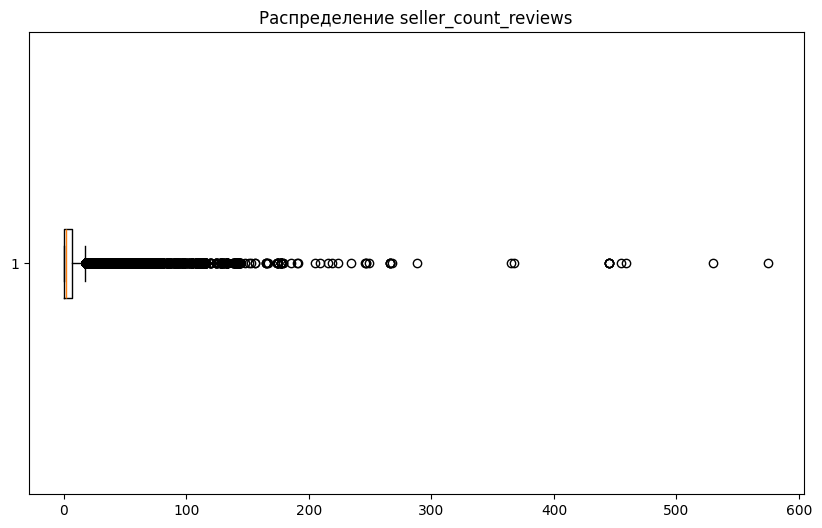

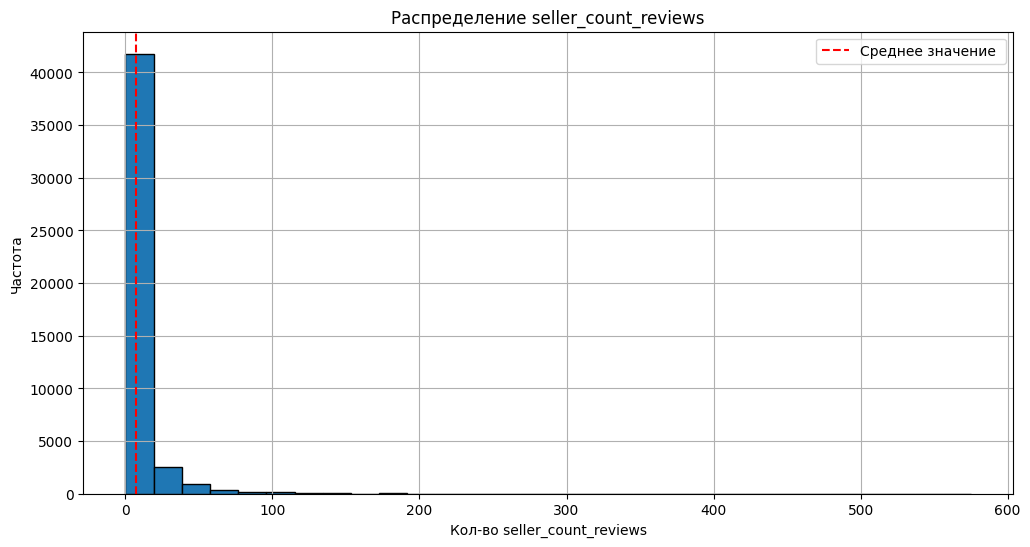

'99-й процентиль составил: 77.0, 95-й процентиль составил: 32.0'

In [25]:
diff(df['seller_count_reviews'])

Промежуточные итоги **seller_count_reviews**:
- Среднее составило 7.122066, в то время как медиана составила 2.000000 , разница - 5.122066, что в пределах нормы для данного столбца. 
- Стандартное отклонение составило 16.979342 отзывов. 
- Максимальное значение отзывов у продавца составило 575.000000, минимальное значение - 0.000000 отзывов. 
- Выбросы есть и их много, но для отзывов это нормально, их количество зависит от активности продавца, времени торговли на площадке и тд. Нормально, что встречаются выбросы.
- Данные имеют левоассимметричное распределение, то есть большинство пользователей имеют меньшее количсевто отзывов.
- 99-й процентиль составил: 77.0, 95-й процентиль составил: 32.0. Выбросы начинают появляться еще до 95 процентиля. 

count    45959.000000
mean         3.189391
std          2.309605
min          0.000000
25%          0.000000
50%          4.900000
75%          5.000000
max          5.000000
Name: seller_rating, dtype: float64

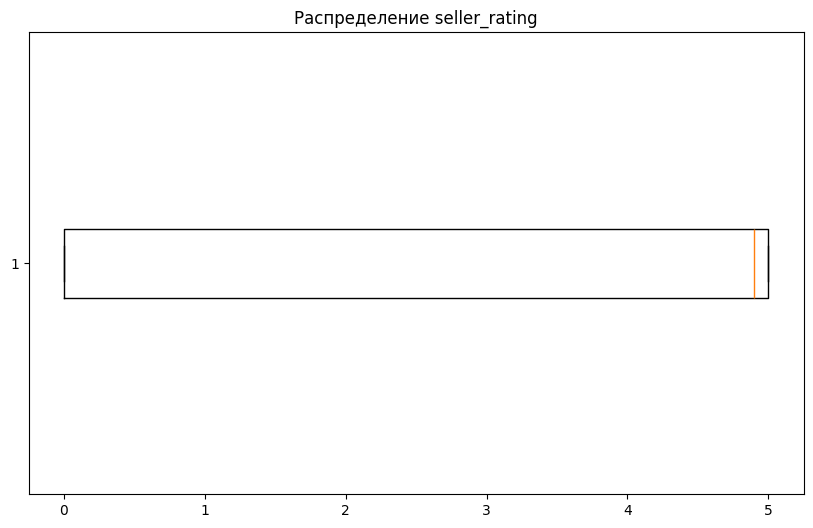

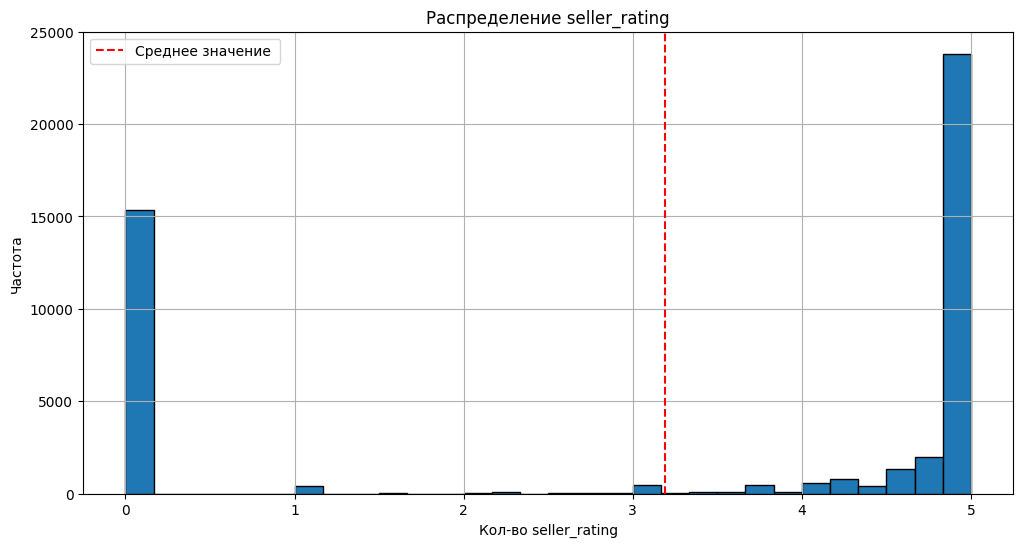

'99-й процентиль составил: 5.0, 95-й процентиль составил: 5.0'

In [26]:
diff(df['seller_rating'])

Промежуточные итоги **seller_rating**:
- Среднее составило 3.189391, в то время как медиана составила 4.900000 , разница - ~1,8, что в пределах нормы. 
- Стандартное отклонение составило 2.309605. 
- Максимальное значение рейтинга продавца составило  5.000000, минимальное значение - 2.000000. 
- Выбросы не обнаружено.
- Данные распределены относительно равномерно, наблюдается большое количество оценок 5 и 0.
- 99-й процентиль составил: 5.0, 95-й процентиль составил: 5.0.

count    45959.000000
mean       136.801040
std        396.852443
min          0.000000
25%         11.000000
50%         33.000000
75%        116.000000
max      24336.000000
Name: page_views, dtype: float64

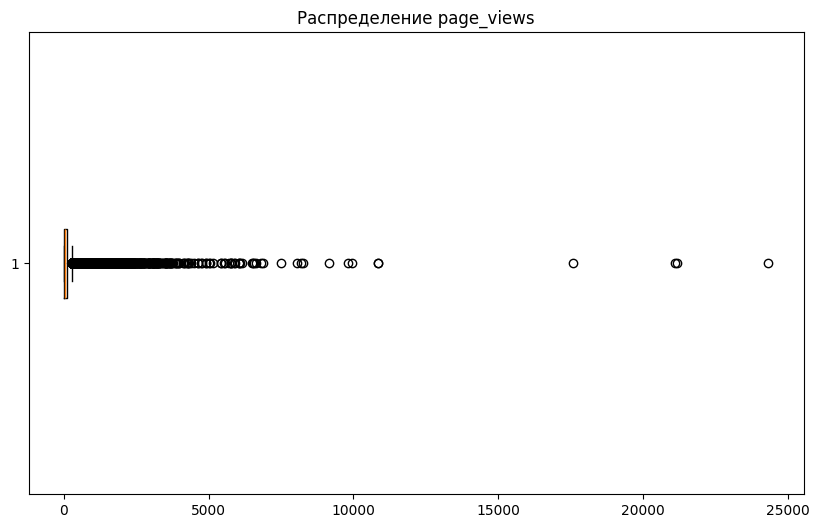

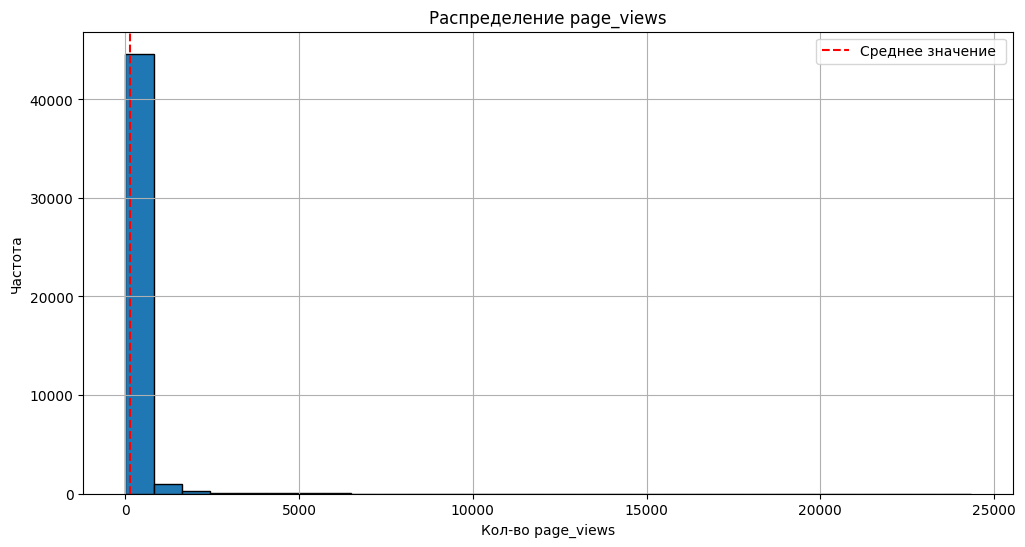

'99-й процентиль составил: 1460.4199999999983, 95-й процентиль составил: 589.0'

In [27]:
diff(df['page_views'])

Промежуточные итоги **page_views**:
- Среднее составило 136.801040 кликов, в то время как медиана составила 33.000000 кликов, разница - 103 клика, что свидетельствует о выбросах. 
- Стандартное отклонение составило 396.852443 клика, что тоже свидетельствует о выбросах. 
- Максимальное значение отзывов у продавца составило 24336.000000 клика, минимальное значение - 0.000000 кликов. 
- Выбросы есть и их много, но для кликов это нормально, их так как некоторые объявления могут быть сильно популярнее остальных, это зависит от профиля продавца, самого объявления, содержания, цены, от продвижения объявления внутри площадки и тд. 
- Данные имеют левоассимметричное распределение, то есть большинство объявлений имеют меньшее количсевто кликов на них.
- 99-й процентиль составил: 1460.4199999999983, 95-й процентиль составил: 589.0. Выбросы начинают появляться еще до 95 процентиля.

count    45959.000000
mean         2.438238
std          7.503354
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        264.000000
Name: contacts, dtype: float64

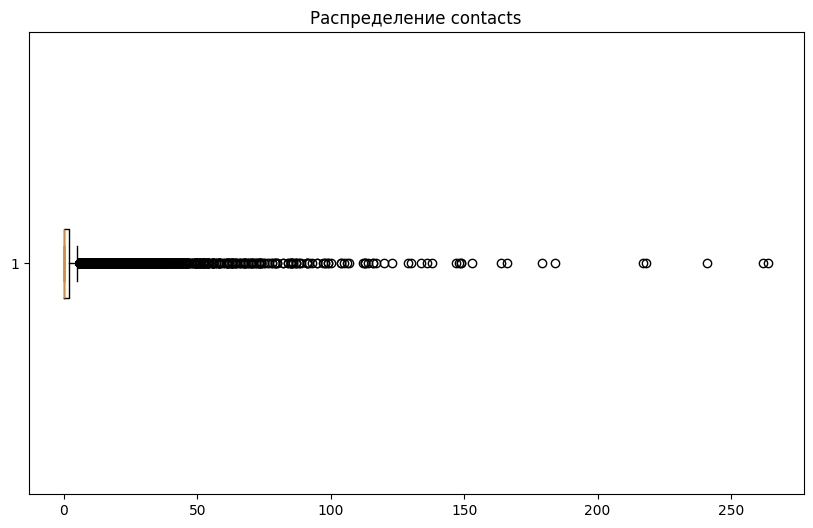

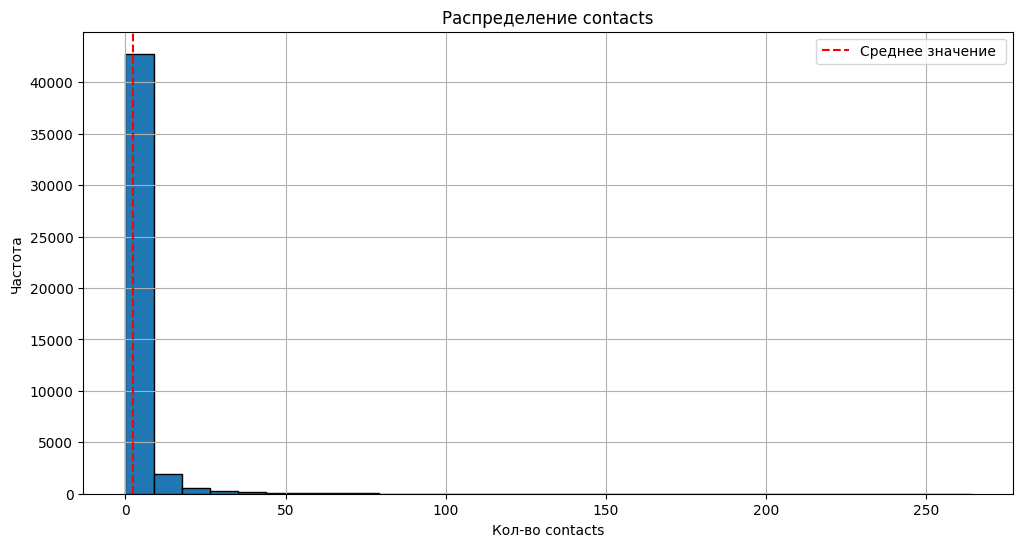

'99-й процентиль составил: 32.0, 95-й процентиль составил: 11.0'

In [28]:
diff(df['contacts'])

Промежуточные итоги **contacts**:
- Среднее составило 2.438238, в то время как медиана составила  0.000000. 
- Стандартное отклонение составило 7.503354 клика, что свидетельствует о выбросах. 
- Максимальное значение отзывов у продавца составило 264.000000, минимальное значение - 0.000000. 
- Выбросы есть и их много, что в целом возможно для действия 'начала чата или просмотра номера телефона', особенность в том, что в основном либо не начинают чат вообще, либо наоборот очень активно пишут продавцу. 
- Данные имеют левоассимметричное распределение, то есть большинство объявлений имеют меньшее количество откликов на них.
- 99-й процентиль составил: 32.0, 95-й процентиль составил: 11.0. Выбросы начинают появляться еще до 95 процентиля.

count    45959.000000
mean         6.977067
std         23.173674
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max       1406.000000
Name: favorites, dtype: float64

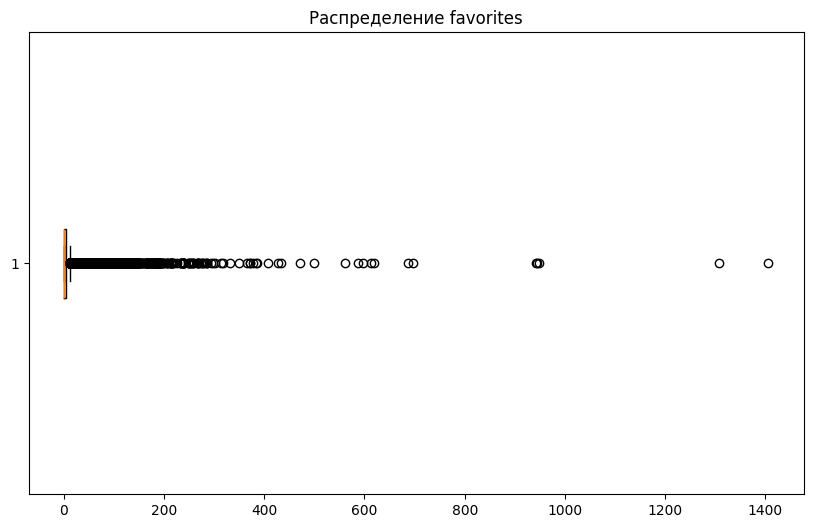

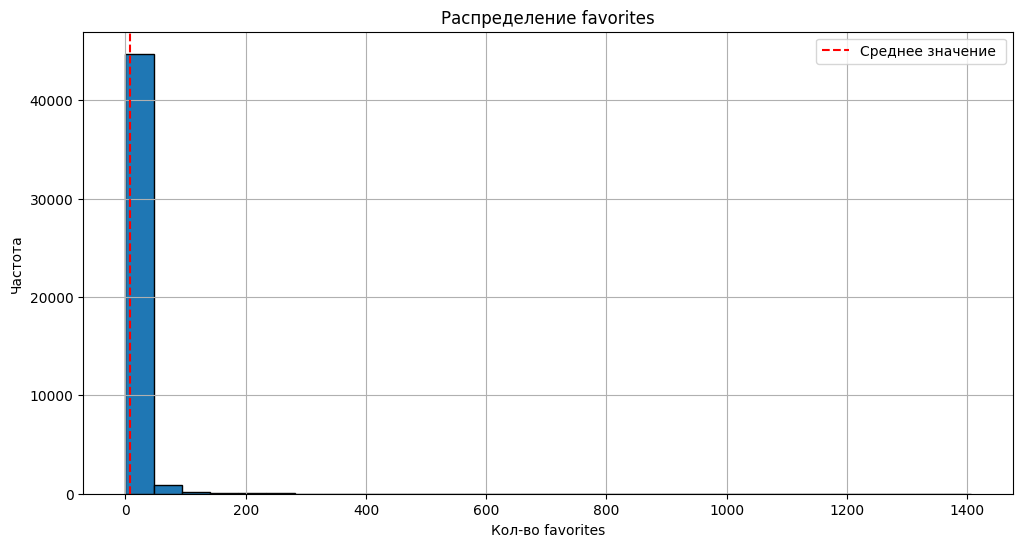

'99-й процентиль составил: 83.0, 95-й процентиль составил: 30.0'

In [29]:
diff(df['favorites'])

Промежуточные итоги **favorites**:
- Среднее составило 6.977067, в то время как медиана составила 1.000000, разница 5.977067, что может свидетельствоать о выбросах. 
- Стандартное отклонение составило 23.173674 добавления в избранное, что тоже свидетельствует о выбросах. 
- Максимальное значение отзывов у продавца составило 1406.000000, минимальное значение - 0.000000. 
- Выбросы есть и их много, что в целом возможно для действия 'добавить в избранное', так как опять таки это сильно зависит от сути объявления, цены, продвижения на платформе, профиля продавца. 
- Данные имеют левоассимметричное распределение, то есть большинство объявлений имеют меньшее количество добавления в избранное.
- 99-й процентиль составил: 83.0, 95-й процентиль составил: 30.0.

count    38197.000000
mean        17.339008
std         29.161081
min          0.000000
25%          3.000000
50%          6.000000
75%         24.000000
max        324.000000
Name: age, dtype: float64

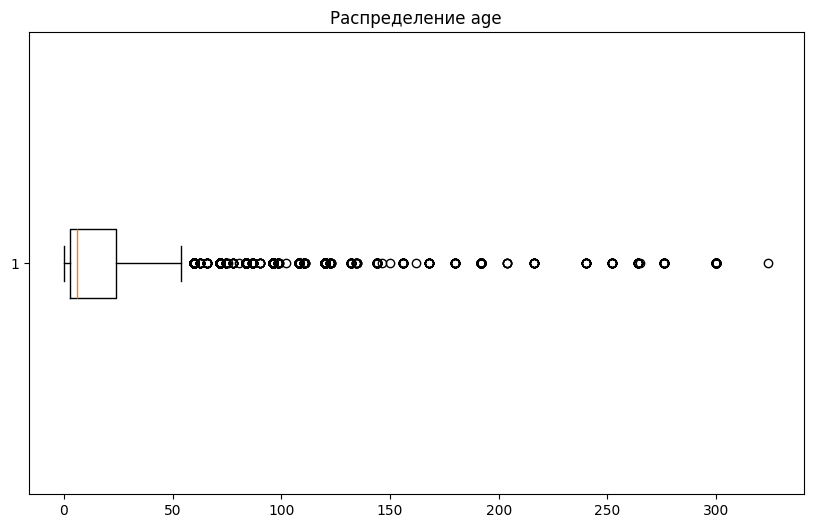

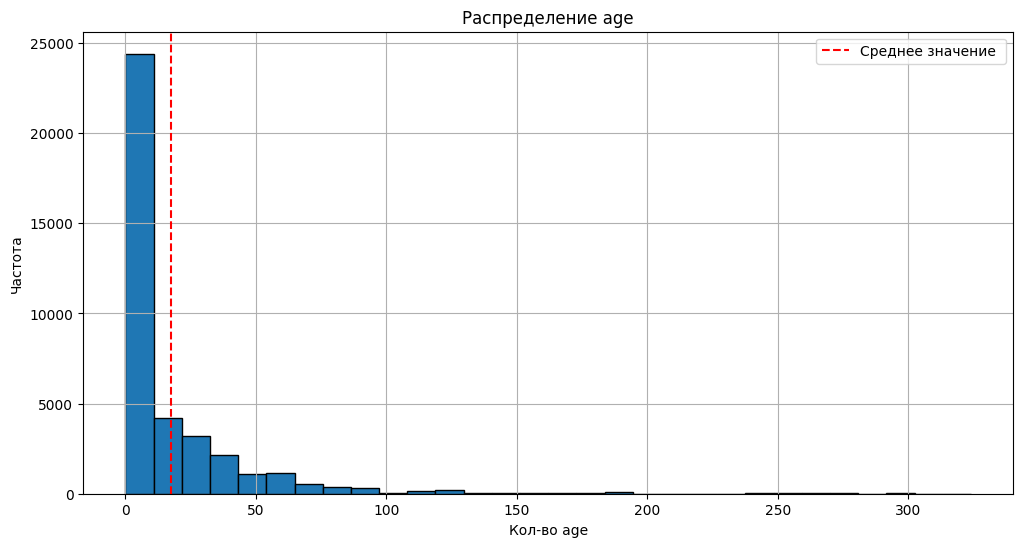

'99-й процентиль составил: 132.0, 95-й процентиль составил: 72.0'

In [30]:
#Отфильтруем заглушки, которые поставили 
df_age = df[df['age'] >= 0]
diff(df_age['age'])


Промежуточные итоги **age**:
Среднее составило 17.339008 месяцев, в то время как медиана составила 6.000000 месяцев, разница велика.
Стандартное отклонение составило 29.160706 месяцев - очень высокое значение, которое в сочетании с разницой среднего и медианы подтверждает, что в столбце есть большие выбросы, распределение имеет тяжелый правых хвост.
Максимальное значение возраста составило 324 месяца (27 лет), что слишком много для жизни домашнего животного. Минимальное значение - 0 месяцев. Такое нереалистичное значение максимального возраста подтверждает наличие выбросов.
99-й процентиль возраста: 132.0 месяца, 95-й процентиль количества комнат составил: 72.0 месяца.
Выбросы есть и их необходимо отфильтровать. Явная ошибка в данных.
Будем фильтровать датасет по 99 процентилю, чтобы исключить выбросы данных.

In [31]:
rows_before_filtered = df.shape[0]
df = df[df['age'] <= df['age'].quantile(0.99)]
rows_after_filtered = df.shape[0]
#Процент удаленных из датасета строк
display(f"Процент отфильтрованных строк: {(rows_before_filtered - rows_after_filtered)/rows_before_filtered * 100}")

'Процент отфильтрованных строк: 0.8812202180204095'

count    45554.000000
mean        18.137178
std          8.748688
min          1.000000
25%         10.000000
50%         25.000000
75%         25.000000
max         25.000000
Name: days_active, dtype: float64

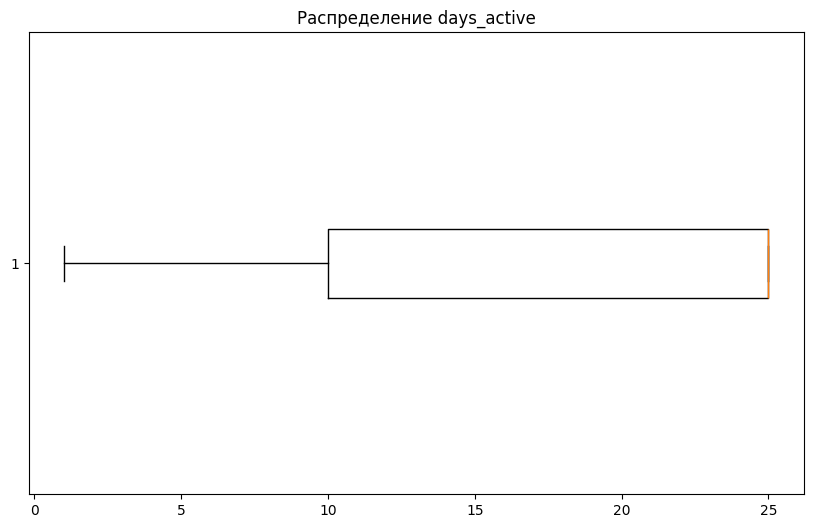

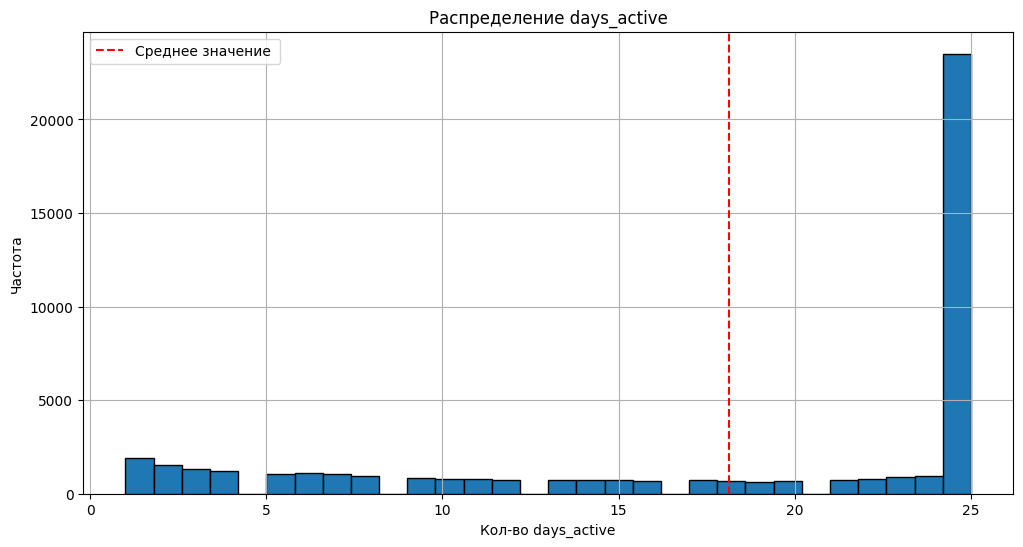

'99-й процентиль составил: 25.0, 95-й процентиль составил: 25.0'

In [32]:
diff(df['days_active'])


Промежуточные итоги **days_active**:

- Среднее составило 18.137178 дней, в то время как медиана составила 25.0 дней, разница относительно данного случая нормальна: пользователь мог быть активным как с начала месяца, так и с конца.
- Стандартное отклонение составило 8.748688 дней, что адекватно для логики этих данных. 
- Максимальное значение активных дней составило 25 дней, что укладывается в картину 30/31 дней месяца. Минимальное значение - 1 день. 
- 99-й процентиль числа дней активности: 25 дней, 95-й процентиль составил: 5 дней.
- Выбросов нет, необходимости фильтрации нет.

Распределение имеет левосторонний хвост. Минимум половина пользователей была активна в течение 25 дней в ноябре 2023 года.

count    45554.000000
mean         3.725688
std          2.437002
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         10.000000
Name: photo_count, dtype: float64

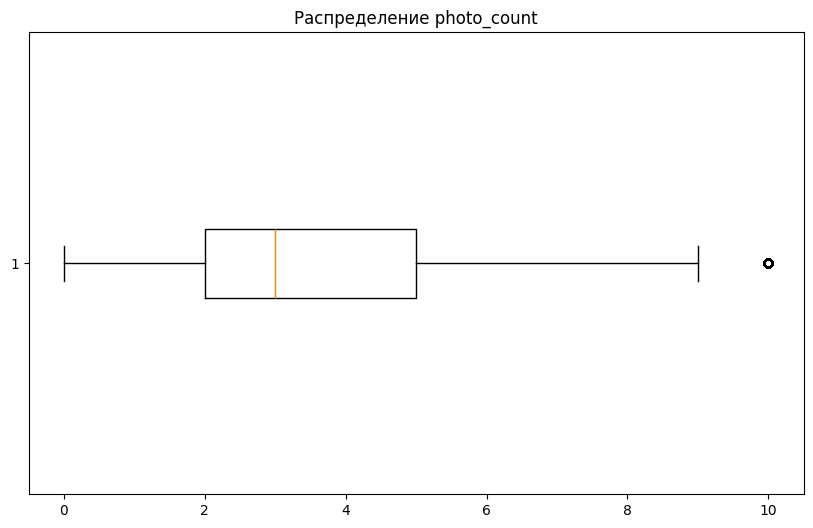

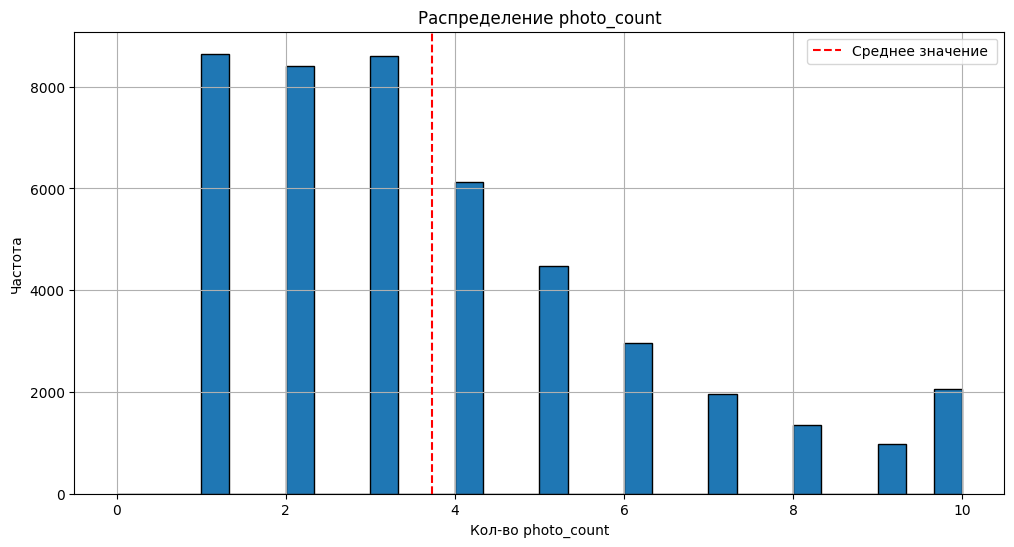

'99-й процентиль составил: 10.0, 95-й процентиль составил: 9.0'

In [33]:
diff(df['photo_count'])


Количество фотографий **photo_count**:

- Среднее составило 3.725688 фотографий, в то время как медиана составила 3.00, разница незначительна - средняя и медиана почти совпадают, что может гооврить об отсутствии значимых выбросов. 
- Стандартное отклонение составило 2.437002 фото, что не очень много. 
- Максимальное значение числа фотографий в объявлении составило 10. Минимальное значение - 0, что является ошибкой данных, необходимо удалить данные значения.
- 99-й процентиль: 10 фотографий, 95-й процентиль составил: 9 фотографий.
- Выброс есть - 0 фотографий. Отфильтруем данные по нему. 



In [34]:
df = df[df['photo_count'] > 0]
rows_after_filtered = df.shape[0]
#Процент удаленных из датасета строк
display(f"Процент отфильтрованных строк: {(rows_before_filtered - rows_after_filtered)/rows_before_filtered * 100}")

'Процент отфильтрованных строк: 0.8833960704105833'

count    3.596700e+04
mean     9.038208e+03
std      6.456987e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+02
max      1.000001e+08
Name: price, dtype: float64

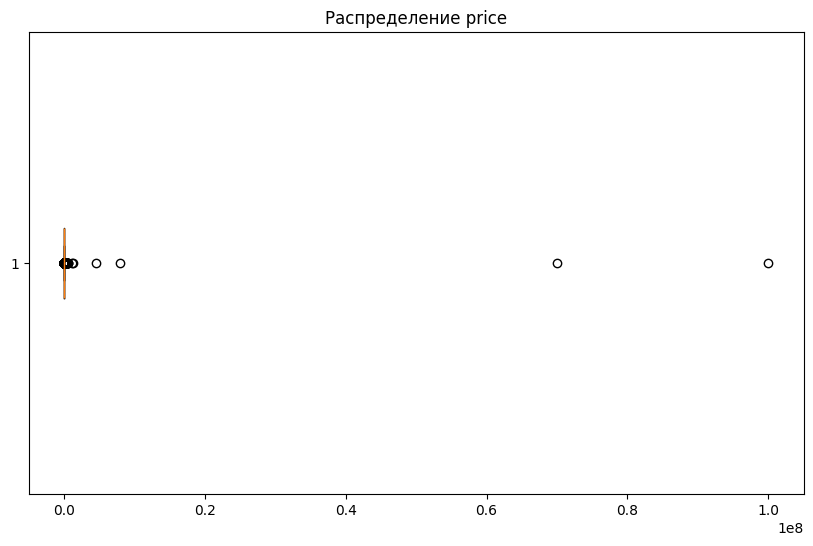

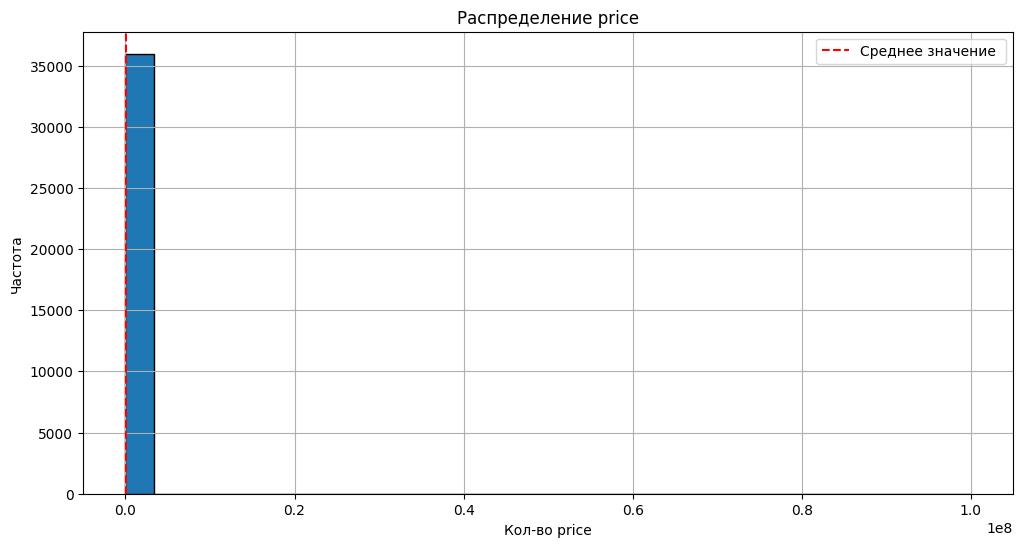

'99-й процентиль составил: 65000.0, 95-й процентиль составил: 25000.0'

In [35]:
# Посмотрим на распределение столбца с ценой, предварительно отфильтровав значения -1, означающие, что продавец не установил цену
df_price = df[df['price']>= 0] 
diff(df_price['price'])


Количество фотографий **price**:

- Среднее составило 9095, в то время как медиана составила 1, разница значительна, что говорит о наличии значимых выбросов. 
- Стандартное отклонение составило 648263, что подтверждает выбросы. 
- Максимальное значение составило 100000090, слишком большое и являющиеся явным выбросом в данных. Минимальное значение - 0, что не является ошибкой данных, ведь животных могут отдавать бесплатно в добрые руки.
- 99-й процентиль: 65000.0, 95-й процентиль составил: 25000.0.
- Выбросы есть. Отфильтруем данные по 99 процентилю. 


In [36]:
df = df[df['price'] <= df['price'].quantile(0.99)]
rows_after_filtered = df.shape[0]
#Процент удаленных из датасета строк
display(f"Процент отфильтрованных строк: {(rows_before_filtered - rows_after_filtered)/rows_before_filtered * 100}")


'Процент отфильтрованных строк: 1.6754063404338648'

count    45189.000000
mean        65.635332
std         44.639979
min          0.000000
25%         27.000000
50%         59.000000
75%        102.000000
max        192.000000
Name: seller_n_month, dtype: float64

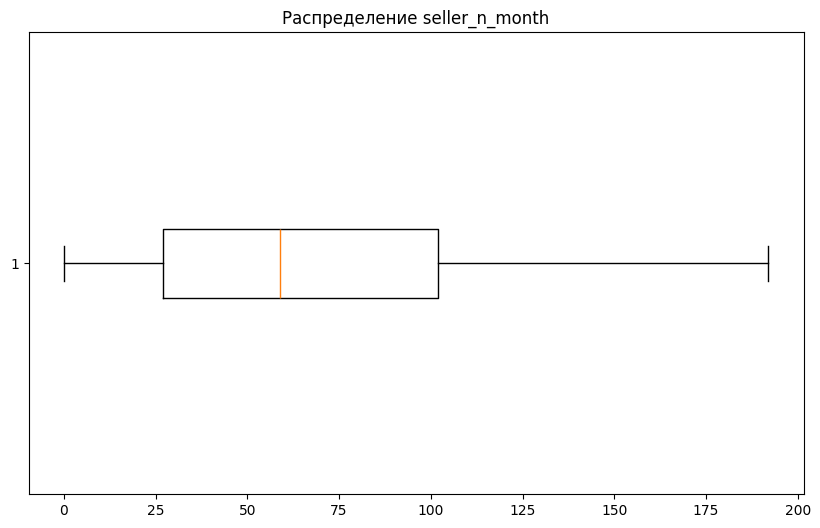

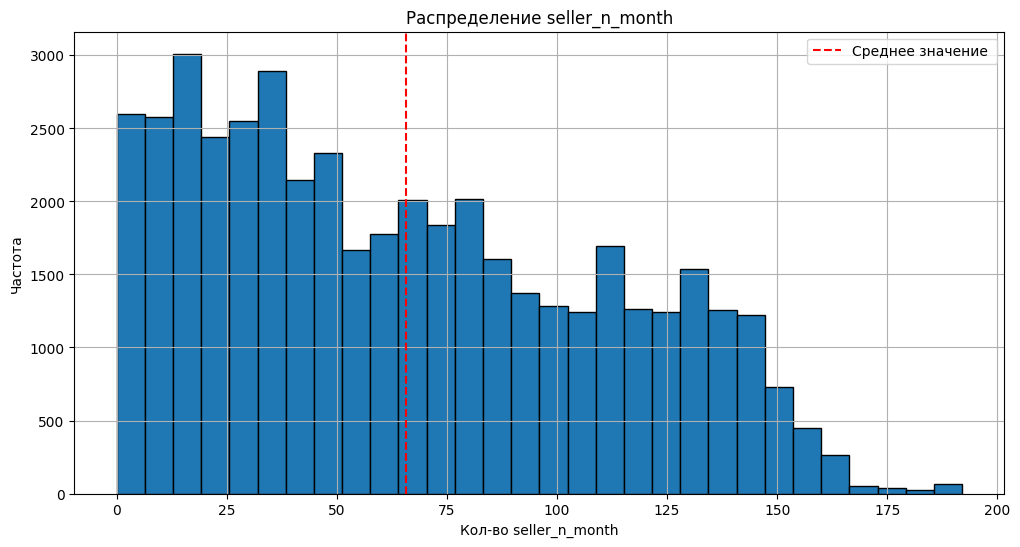

'99-й процентиль составил: 159.0, 95-й процентиль составил: 144.0'

In [37]:
diff(df['seller_n_month'])

Промежуточные итоги **seller_n_month**:

Среднее составило 66, в то время как медиана составила 59, разница незначительна - 7 месяцев.
Стандартное отклонение составило 45 месяцев, достаточно много, что говорит о большом разбросе данных.
Максимальное значение составило 192 месяца (16 лет), что говорит о том, что продавец является пользователм Авито с 2007 года - даты появляения этого сервиса. Минимальное значение - 0, что не является ошибкой данных - еще не прошел месяц после регистрации данных польователей.
99-й процентиль: 159.0, 95-й процентиль составил: 144.0.
Выбросов в данных нет, необходимости фильтрации так же нет.

In [38]:

# Общее количество строк, удаленное в ходе предобработке данных
deleted_rows = rows - df.shape[0]
display(f'Общее количество строк, удаленное в ходе предобработке данных {deleted_rows}')

deleted_rows = deleted_rows/rows * 100
display(f'Процент строк, удаленных в ходе предобработке данных, от изначального датафрейма {deleted_rows}')

'Общее количество строк, удаленное в ходе предобработке данных 4811'

'Процент строк, удаленных в ходе предобработке данных, от изначального датафрейма 9.622'

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45189 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   item_id                 45189 non-null  object 
 1   category                45189 non-null  object 
 2   days_active             45189 non-null  int8   
 3   has_video               45189 non-null  bool   
 4   photo_count             45189 non-null  int8   
 5   title                   45189 non-null  object 
 6   title_length            45189 non-null  int8   
 7   description_length      45189 non-null  int16  
 8   description_word_count  45189 non-null  int16  
 9   description             45189 non-null  object 
 10  breed                   45189 non-null  object 
 11  gender                  45189 non-null  object 
 12  age                     45189 non-null  float32
 13  price                   45189 non-null  int32  
 14  seller_n_month          45189 non-null  int

## Итоги по предобработке данных
- Датасет содержит 20 столбцов и 45189 строк. 
- Есть пропуски в столбцах `age`, `seller_count_reviews`, `seller_rating`, `breed`. В столбце `breed` была поставлена заглушка `Неизвестно`, в `age` поставлена заглушка `-1`, пропуски в столбцах `seller_rating` и `seller_count_reviews` было всего 2-3%, поэтому мы их удалили для удобства последующего анализа.
- Название столбца `DescriptionRu` изменили на `description`. 
- Столбцы `item_id`, `category` , `title` , `description`, `breed`, `gender`, `age`, `seller_rating` имеют тип данных `object`.
- В столбцах `age`, `seller_rating` изменили тип данных на `float`, так как столбцы содержат информацию о цифрах и понизили размерность для экономии памяти. 
- Столбцы `days_active`, `photo_count`, `title_length`, `description_length`, `description_word_count`, `price`, `seller_n_month`, `page_views`, `contacts`, `favorites` имеют тип данных `int64`. Мы понизили размерность для экономии памяти. 
- Столбец `seller_count_reviews` имеет тип данных `float64`. Мы понизили размерность для экономии памяти. 
- Столбец `has_video` имеет тип данных `bool`.
- Были обнаружены пропуски по `item_id`, по `item_id` в связке с `title` и по `description` в связке с `title. Было очень сложно установить природу пропусков в данном случае, поэтому было принято решение удалить данные дубликаты полностью. 
- В данных были обнаружены выбросы и в большинстве случаев они являются нормой, в отличие от выбросов в столбцах `age`, `photo_count`, `price`. В столбце `age` максимальное значение составило 324 месяца, что равно 27 годам - слишком большой возраст для собак и кошек, отфильтровали столбец по 99 процентилю. В `photo_count` были обнаружены значения 0, что невозможно, так как при публикации объявления продаве обязан приложить минимум 1 фото, данные были отфильтрованы. В столбце `price` значения были отфильтрованы по 99 процентилю, так как макисмальное значение 100000090 - слишком высокая цена для собки или кошки. 
- В итоге предобработке были потеряны 9.622 % строк (4811 - абсолютное значение)

## Часть 1. Инсайты для платформы Авито

### Построение воронки пользовательского пути в общем и по категориям, определение статистически значимых различий метрик. 

In [40]:
# Выделим два датафрейма, раздел исходный на собак и кошек
df_dogs = df[df['category'] == 'Собаки']
df_cats = df[df['category'] == 'Кошки']

,steps,users,conversion_from_first_%
0,page_views,1654,100.00
1,favorites,255,15.42
2,contacts,125,7.56


/var/folders/xl/_7t_lfxs2cn13d3n1jpw_wgm0000gn/T/ipykernel_4538/1744597862.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


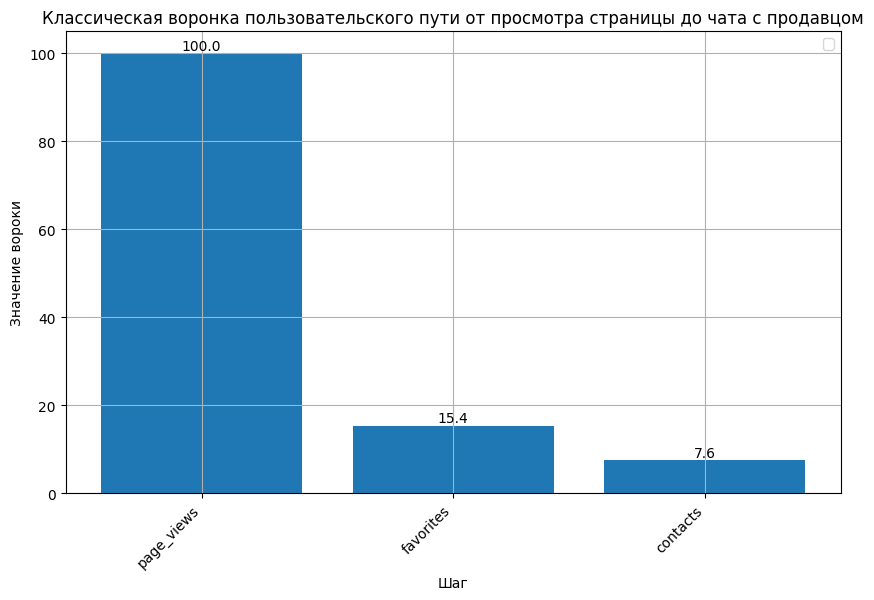

In [41]:
# Определяем шаги воронки в правильном порядке
steps = ['page_views', 'favorites', 'contacts']

# Считаем пользователей для каждого шага
user_counts = []
user_counts.append(df['page_views'].nunique())  # page_views
user_counts.append(df['favorites'].nunique()) # favorites
user_counts.append(df['contacts'].nunique()) # contacts

# Создаем DataFrame
df_funnel = pd.DataFrame({
    'steps': steps,
    'users': user_counts
})


df_funnel['conversion_from_first_%'] = round(df_funnel['users']/df_funnel['users'].iloc[0]*100, 2)

display(df_funnel)

# Визуализируем классическую воронку пользовательского пути
plt.figure(figsize=(10, 6))
bars = plt.bar(df_funnel['steps'], df_funnel['conversion_from_first_%'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title('Классическая воронка пользовательского пути от просмотра страницы до чата с продавцом')
plt.grid()
plt.legend()
plt.xlabel('Шаг')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Значение вороки')
plt.show() 

,steps,users,conversion_from_first_%
0,page_views,1426,100.00
1,favorites,206,14.45
2,contacts,117,8.20


/var/folders/xl/_7t_lfxs2cn13d3n1jpw_wgm0000gn/T/ipykernel_4538/1909544966.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


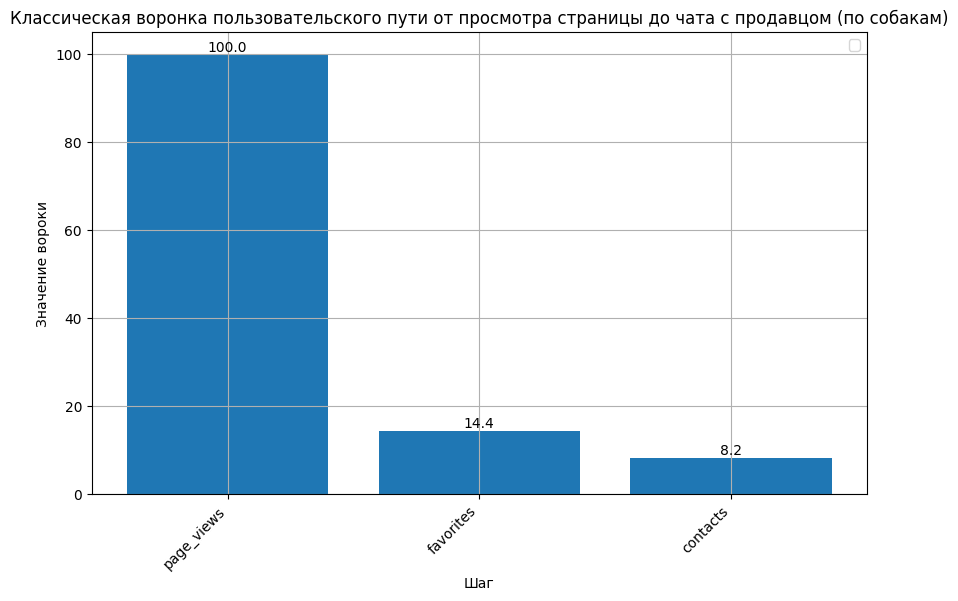

In [42]:
# Определяем шаги воронки в правильном порядке
steps = ['page_views', 'favorites', 'contacts']

# Считаем пользователей для каждого шага
user_counts = []
user_counts.append(df_dogs['page_views'].nunique())  # page_views
user_counts.append(df_dogs['favorites'].nunique()) # favorites
user_counts.append(df_dogs['contacts'].nunique()) # contacts

# Создаем DataFrame
df_funnel_dogs = pd.DataFrame({
    'steps': steps,
    'users': user_counts
})


df_funnel_dogs['conversion_from_first_%'] = round(df_funnel_dogs['users']/df_funnel_dogs['users'].iloc[0]*100, 2)

display(df_funnel_dogs)

# Визуализируем классическую воронку пользовательского пути
plt.figure(figsize=(10, 6))
bars = plt.bar(df_funnel_dogs['steps'], df_funnel_dogs['conversion_from_first_%'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title('Классическая воронка пользовательского пути от просмотра страницы до чата с продавцом (по собакам)')
plt.grid()
plt.legend()
plt.xlabel('Шаг')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Значение вороки')
plt.show() 

,steps,users,conversion_from_first_%
0,page_views,1079,100.00
1,favorites,202,18.72
2,contacts,85,7.88


/var/folders/xl/_7t_lfxs2cn13d3n1jpw_wgm0000gn/T/ipykernel_4538/3595588781.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


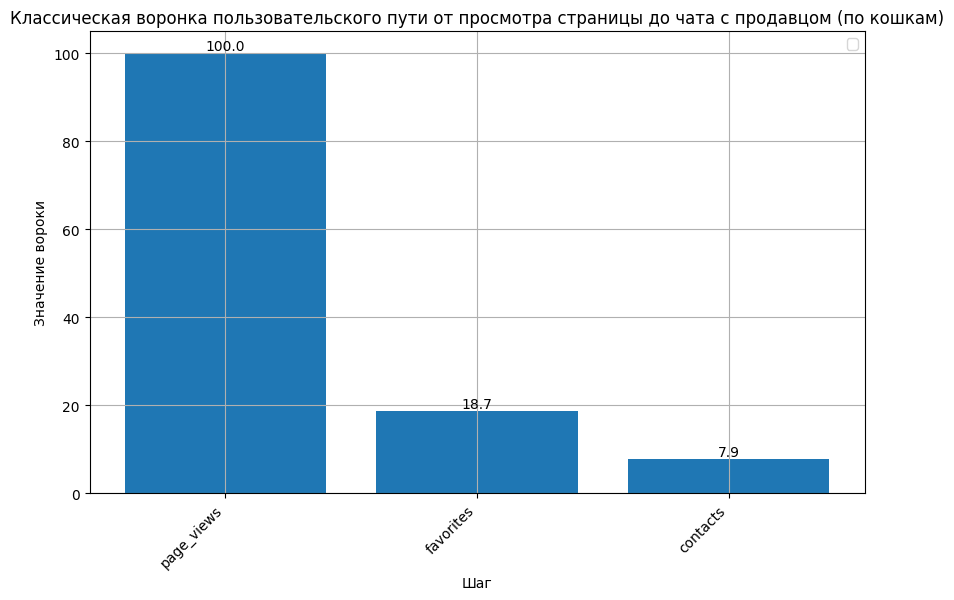

In [43]:
# Определяем шаги воронки в правильном порядке
steps = ['page_views', 'favorites', 'contacts']

# Считаем пользователей для каждого шага
user_counts = []
user_counts.append(df_cats['page_views'].nunique())  # page_views
user_counts.append(df_cats['favorites'].nunique()) # favorites
user_counts.append(df_cats['contacts'].nunique()) # contacts

# Создаем DataFrame
df_funnel_cats = pd.DataFrame({
    'steps': steps,
    'users': user_counts
})


df_funnel_cats['conversion_from_first_%'] = round(df_funnel_cats['users']/df_funnel_cats['users'].iloc[0]*100, 2)

display(df_funnel_cats)

# Визуализируем классическую воронку пользовательского пути
plt.figure(figsize=(10, 6))
bars = plt.bar(df_funnel_cats['steps'], df_funnel_cats['conversion_from_first_%'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title('Классическая воронка пользовательского пути от просмотра страницы до чата с продавцом (по кошкам)')
plt.grid()
plt.legend()
plt.xlabel('Шаг')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Значение вороки')
plt.show() 

**H0**: Конверсия добавления в избранное (`favorites`) у собак и кошек статистически значимо не различается. 

**H1**: Конверсия добавления в избранное (`favorites`) у собак и кошек статистически значимо  различается. 

In [44]:

n_a = df_funnel_dogs[df_funnel_dogs['steps'] == 'page_views']['users']
n_b = df_funnel_cats[df_funnel_cats['steps'] == 'page_views']['users']
    
m_a = df_funnel_dogs[df_funnel_dogs['steps'] == 'favorites']['users']
m_b = df_funnel_cats[df_funnel_cats['steps'] == 'favorites']['users']
    
alpha = 0.05
    
stats_ztest, p_value_ztest = proportions_ztest(
[m_a , m_b], 
[n_a, n_b], 
alternative = 'two-sided')
    
if p_value_ztest > alpha:
    print(f'p_value = {p_value_ztest}>{alpha}')
    print(f'Конверсия добавления в избранное (`favorites`) у собак и кошек статистически значимо не различается.')
else:
    print(f'p_value = {p_value_ztest}<{alpha}')
    print(f'Конверсия добавления в избранное (`favorites`) у собак и кошек статистически значимо различается.')

p_value = [0.00411306]<0.05
Конверсия добавления в избранное (`favorites`) у собак и кошек статистически значимо различается.


**H0**: Конверсия начала чата или просмотра номера телефона (`contacts`) у собак и кошек статистически значимо не различается. 

**H1**: Конверсия начала чата или просмотра номера телефона (`contacts`) у собак и кошек статистически значимо  различается. 

In [45]:

n_a = df_funnel_dogs[df_funnel_dogs['steps'] == 'page_views']['users']
n_b = df_funnel_cats[df_funnel_cats['steps'] == 'page_views']['users']
    
m_a = df_funnel_dogs[df_funnel_dogs['steps'] == 'contacts']['users']
m_b = df_funnel_cats[df_funnel_cats['steps'] == 'contacts']['users']

    
alpha = 0.05
    
stats_ztest, p_value_ztest = proportions_ztest(
[m_a , m_b], 
[n_a, n_b], 
alternative = 'two-sided')
    
if p_value_ztest > alpha:
    print(f'p_value = {p_value_ztest}>{alpha}')
    print(f'Конверсия начала чата или просмотра номера телефона (`contacts`) у собак и кошек статистически значимо не различается. ')
else:
    print(f'p_value = {p_value_ztest}<{alpha}')
    print(f'Конверсия начала чата или просмотра номера телефона (`contacts`) у собак и кошек статистически значимо  различается.')

p_value = [0.76590136]>0.05
Конверсия начала чата или просмотра номера телефона (`contacts`) у собак и кошек статистически значимо не различается. 


Промежуточные итоги: 
- 15.4% пользователей от просмотревших страницу объявления добавляют ее в избранное и только 7.6% пользователей после просмотра страницы пишут продавцу. 
Возможно, такие низкие показатели добавления в избранное после просмотра объявления связанны с тем, что в листая ленту Авито пользователь сразу видит много объявлений и они считаются как просмотренные, хотя детального изучения объявления не было. Для большей конкретизации пользовательского пути рекомендуем добавить следующие шаги:

- page_click - клик пользователя по конкретному объявлению и его изучение
- start_order - сделал закакз и ждет доставки/сделал заказ и назначил встречу с продавцом
- delivery - количество пользователей, выбравших именно доставку товара, а не личную встречу
- cancel_order - заказ не подашел и сделка не завершилась
- complete_order - сделка состоялась, товар выкуплен
- review_after_order - пользователь оставил отзыв после завершения сделки 

Такие шаги потомгут лучше понять пользовательское поведение и сделать более точные выводы. 

- 14.4% пользователей от просмотревших страницу объявления о продаже собаки добавляют ее в избранное и только 8.2% пользователей после просмотра страницы пишут продавцу. 
- 18.47 пользователей от просмотревших страницу объявления о продаже кошки добавляют ее в избранное и только 7.9% пользователей после просмотра страницы пишут продавцу. 
- Конверсия добавления в избранное у собак и кошк статистически значимо различается. Действительно, объявления с собаками чаще добавляют в избранное. 
- Конверсия начала чата или просмотра номера телефона у собак и кошек статистически значимо не различается. 

### Корреляционный анализ, поиск инсайтов. 

interval columns not set, guessing: ['contacts', 'favorites', 'age', 'seller_count_reviews', 'seller_rating', 'page_views', 'description_length', 'photo_count', 'price']


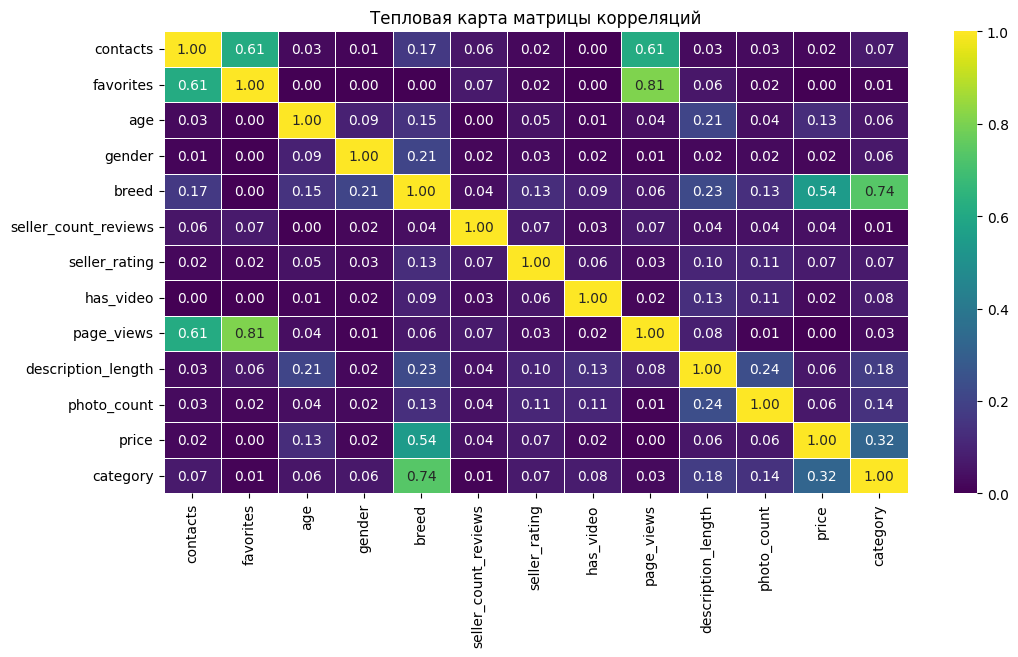

,contacts,favorites,age,gender,breed,seller_count_reviews,seller_rating,has_video,page_views,description_length,photo_count,price,category
contacts,1.000000,0.611161,0.026237,0.012988,0.167708,0.055315,0.020763,0.000000,0.613273,0.029534,0.028133,0.019643,0.069248
favorites,0.611161,1.000000,0.000000,0.000000,0.000000,0.067727,0.017556,0.000000,0.806356,0.059644,0.019181,0.000000,0.011136
age,0.026237,0.000000,1.000000,0.092928,0.147753,0.000000,0.047806,0.014910,0.037131,0.205397,0.038432,0.125075,0.058535
gender,0.012988,0.000000,0.092928,1.000000,0.206490,0.016126,0.029398,0.015325,0.011309,0.020269,0.023575,0.018524,0.063418
breed,0.167708,0.000000,0.147753,0.206490,1.000000,0.038109,0.128329,0.092341,0.063199,0.225875,0.133011,0.543723,0.737763
seller_count_reviews,0.055315,0.067727,0.000000,0.016126,0.038109,1.000000,0.072807,0.029705,0.066659,0.044964,0.044431,0.042551,0.010232
seller_rating,0.020763,0.017556,0.047806,0.029398,0.128329,0.072807,1.000000,0.062032,0.033140,0.104311,0.107119,0.073571,0.069106
has_video,0.000000,0.000000,0.014910,0.015325,0.092341,0.029705,0.062032,1.000000,0.017782,0.134400,0.107328,0.023440,0.077626
page_views,0.613273,0.806356,0.037131,0.011309,0.063199,0.066659,0.033140,0.017782,1.000000,0.082272,0.009245,0.000000,0.025823
description_length,0.029534,0.059644,0.205397,0.020269,0.225875,0.044964,0.104311,0.134400,0.082272,1.000000,0.236870,0.060040,0.178338


In [46]:
corr_columns = ['contacts','favorites','age','gender','breed','seller_count_reviews', 'seller_rating', 'has_video', 'page_views', 'description_length', 'photo_count', 'price', 'category']

corr_matrix = df[corr_columns].phik_matrix()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot = True, fmt='.2f', linewidths=0.5, cmap='viridis')

plt.title('Тепловая карта матрицы корреляций')
plt.show()

display(corr_matrix)

Промежуточные итоги по корреляции данных:

От 0 до 0.3 — слабая корреляция, то есть взаимосвязи практически нет. Что важно было узнать:
- Слабая положительная корреляция между **contacts (начало чата с продавцом) и breed (породой) - 0.17.** То есть в целом есть определенная зависимость между этими параметрами, но незначительная. 
- Слабая положительная корреляция между **age (возраст животного) и price (цена животного) - 0.13.** То есть в целом есть определенная зависимость между этими параметрами, но незначительная. 
- Слабая положительная корреляция между **seller_count_reviews (количество отзывов у продавца) и seller_rating (рейтинг продавца) - 0.07.** То есть в целом есть определенная зависимость между этими параметрами, но незначительная. Это важный инсайт, так как в целом было бы логично предположить, что рейтинг продавца и количество отзывов могут коррелировать, но это не так. Это означает, что в теории можно иметь много отзывов (получается, что негативных) и низкий рейтинг.
- Слабая положительная корреляция между **page_views (просмотр странички объявления) и has_video (наличие видео) - 0.02.** То есть в целом есть определенная зависимость между этими параметрами, но незначительная. 
- Слабая положительная корреляция между **page_views (просмотр странички объявления) и photo_count (количсетво фото) - 0.01.** То есть в целом есть определенная зависимость между этими параметрами, но незначительная. 
- Слабая положительная корреляция между **page_views (просмотр странички объявления) и description_length (длина описания) - 0.08.** То есть в целом есть определенная зависимость между этими параметрами, но незначительная. 
- Слабая положительная корреляция между **gender (пол животного) и price (цена животного) - 0.02.** То есть в целом есть определенная зависимость между этими параметрами, но незначительная.


От 0.3 до 0.7 — умеренная корреляция: существует взаимосвязь, но она не очень сильная. Что важно было узнать:
- Умеренно высокая положительная корреляция **favorites (добавление в избранное) и contacts (начало чата с продавцом) - 0.61.** Означает, что если растет один параметр, то растет и второй. 
- Умеренно высокая положительная корреляция **page_views (просмотр странички объявления) и contacts (начало чата с продавцом) - 0.61.** Означает, что если растет один параметр, то растет и второй. 
- Умеренно положительная корреляция **breed (породой) и price (цена животного)  - 0.52.** Можно предположить, что чем уникальнее/популярнее порода, тем выше цена. 
- Умеренно положительная корреляция **price (цена животного) и category (категория объявления - Кошки/Собаки) - 0.32.**  Означает, что данные параметры зависимы друг от друга. 

От 0.7 до 1.0 — сильная корреляция: не обнаружено. Что важно было узнать:
- Сильная положительная корреляция между **favorites (добавление в избранное) и page_views (просмотр странички объявления) - 0.81.** Означает, что рост одного параметра сильно влияет на рост второго.

0 - нет корреляции. Что важно было узнать:

- Нет корреляции между параметром **price (цена жифотного) и параметрами page_views (просмотр странички объявления) и favorites (добавление в избранное)**. То есть цена не влияет на просмотры объявления и добавление его в избранное. 

Важные инсайты: 
- Наличие видео в объявлении почти не коррелирует с просмотрами объявления. В данном случае есть риск искажения в виду экстремально высоких просмотров объявления без видео. 
- Порода имеет корреляцию с важным параметром - ценой. Возможно стоит сделать поиск по породе наиболее удобным и эффективным, обязать продавцов его заполнять, а не определять породу автоматически (уже было упомянуто, что это из-за этого в данных много пропусков), чтобы увеличить шанс сделки между продавцом и покупателем. 

### Формирование рекомендаций для продукта


**Инсайты:**
- Конверсия добавления в избранное у собак и кошек статистически значимо различается. Действительно, объявления с собаками чаще добавляют в избранное. 
- Наличие видео в объявлении почти не коррелирует с просмотрами объявления. В данном случае есть риск искажения в виду экстремально высоких просмотров объявления без видео. 
- Порода имеет корреляцию с важным параметром - ценой. Возможно стоит сделать поиск по породе наиболее удобным и эффективным, обязать продавцов его заполнять, а не определять породу автоматически (уже было упомянуто, что это из-за этого в данных много пропусков), чтобы увеличить шанс сделки между продавцом и покупателем. 

**Рекомендации:**

1. Рекомендуем для уточнения пользовательского пути начать отслеживать следущие действия пользователей:
- page_click - клик пользователя по конкретному объявлению и его изучение
- start_order - сделал закакз и ждет доставки/сделал заказ и назначил встречу с продавцом
- delivery - количество пользователей, выбравших именно доставку товара, а не личную встречу
- cancel_order - заказ не подашел и сделка не завершилась
- complete_order - сделка состоялась, товар выкуплен
- review_after_order - пользователь оставил отзыв после завершения сделки. 

2. Стоит сделать поиск по породе наиболее удобным, так как ест зависимость породы и цены. Стоит обязать продавцов заполнять породу самостоятельно в отдельной графе объявления для больший прозрачности цен по породам. 



## Часть 2. Портрет рынка животных на Авито
### Соотношение кошек и собак в объявлениях. Средние цены, возраст, популярные породы в каждой категории.

In [47]:
# Посмотрим, сколько объявлений с кошками и собаками есть на платформе
df.groupby('category')['item_id'].nunique()

category
Кошки     24973
Собаки    20216
Name: item_id, dtype: int64

Объявлений с кошками (24973) больше, чем с собками (20216). Разница составила 4757 объявлений. Далее для удобства анализа разделим датасеты на объявления только с кошками и только с собками.

,breed,item_id,breed_percentage
18,Неизвестно,10904,24.129766
9,Дог,1918,4.244396
34,Шпиц,1124,2.487331
31,Чихуахуа,712,1.575605


45189

/var/folders/xl/_7t_lfxs2cn13d3n1jpw_wgm0000gn/T/ipykernel_4538/3854362769.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


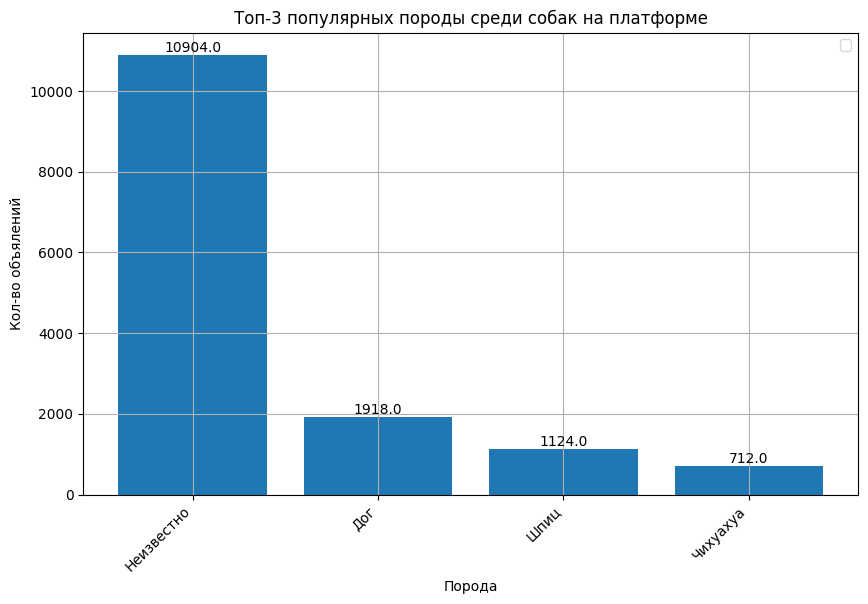

In [48]:
# Топ популярных попрод собак
top_dogs = df_dogs.groupby('breed')['item_id'].nunique().reset_index().sort_values(by = ['item_id'], ascending = False).iloc[0:4, :]
total_item = df['item_id'].nunique()

top_dogs['breed_percentage'] = top_dogs['item_id']/total_item*100

display(top_dogs)
display(total_item)

plt.figure(figsize=(10,6))
bars = plt.bar(top_dogs['breed'], top_dogs['item_id'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title(f'Топ-3 популярных породы среди собак на платформе')
plt.grid()
plt.legend()
plt.xlabel('Порода')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Кол-во объялений')
plt.show()



,breed,item_id,breed_percentage
4,Боксер,67,0.148266
1,Бивер,66,0.146053
16,Мастиф,45,0.099582


/var/folders/xl/_7t_lfxs2cn13d3n1jpw_wgm0000gn/T/ipykernel_4538/2103161057.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


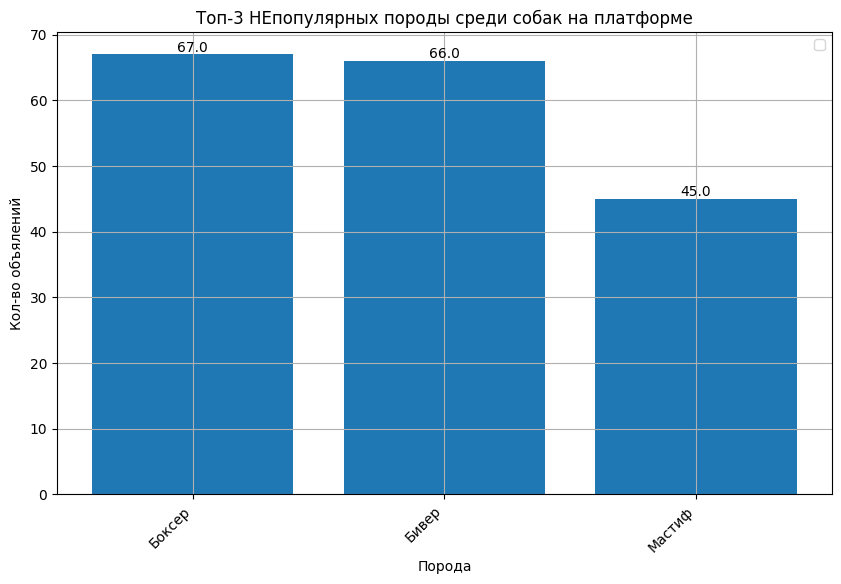

In [49]:
# Топ непопулярных попрод собак
antitop_dogs = df_dogs.groupby('breed')['item_id'].nunique().reset_index().sort_values(by = ['item_id'], ascending = False).iloc[-3:, :]

antitop_dogs['breed_percentage'] = antitop_dogs['item_id']/total_item*100

display(antitop_dogs)

plt.figure(figsize=(10,6))
bars = plt.bar(antitop_dogs['breed'], antitop_dogs['item_id'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title(f'Топ-3 НЕпопулярных породы среди собак на платформе')
plt.grid()
plt.legend()
plt.xlabel('Порода')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Кол-во объялений')
plt.show()


,breed,item_id,breed_percentage
6,Неизвестно,20239,44.787448
14,Шотландская,1188,2.628958
1,Британская,920,2.035894
4,Мейн-кун,606,1.341034


/var/folders/xl/_7t_lfxs2cn13d3n1jpw_wgm0000gn/T/ipykernel_4538/625830593.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


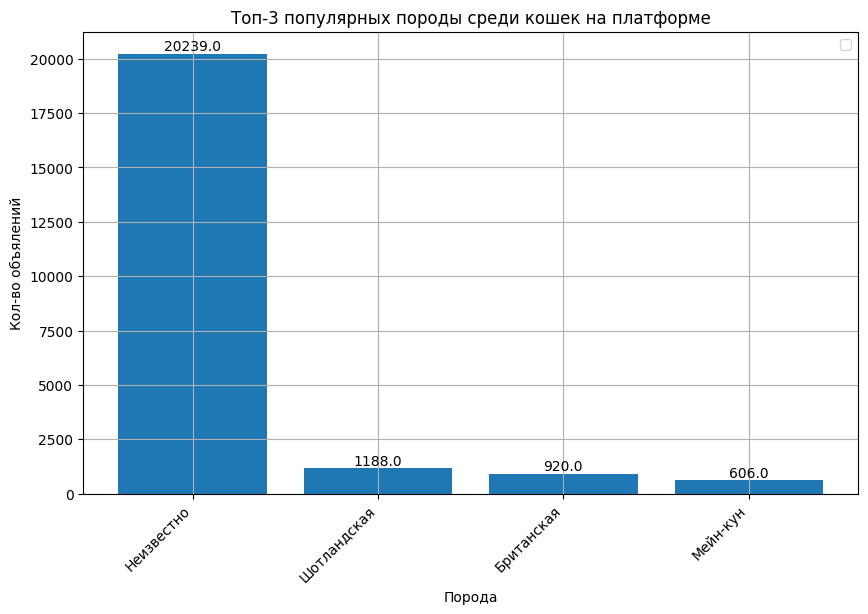

In [50]:
# Топ популярных пород кошек
top_cats = df_cats.groupby('breed')['item_id'].nunique().reset_index().sort_values(by = ['item_id'], ascending = False).iloc[0:4, :]

top_cats['breed_percentage'] = top_cats['item_id']/total_item*100

display(top_cats)

plt.figure(figsize=(10,6))
bars = plt.bar(top_cats['breed'], top_cats['item_id'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title(f'Топ-3 популярных породы среди кошек на платформе')
plt.grid()
plt.legend()
plt.xlabel('Порода')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Кол-во объялений')
plt.show()



,breed,item_id,breed_percentage
12,Тайская,98,0.216867
3,Курильский бобтейл,78,0.172608
7,Персидская,65,0.143840


/var/folders/xl/_7t_lfxs2cn13d3n1jpw_wgm0000gn/T/ipykernel_4538/1609541121.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


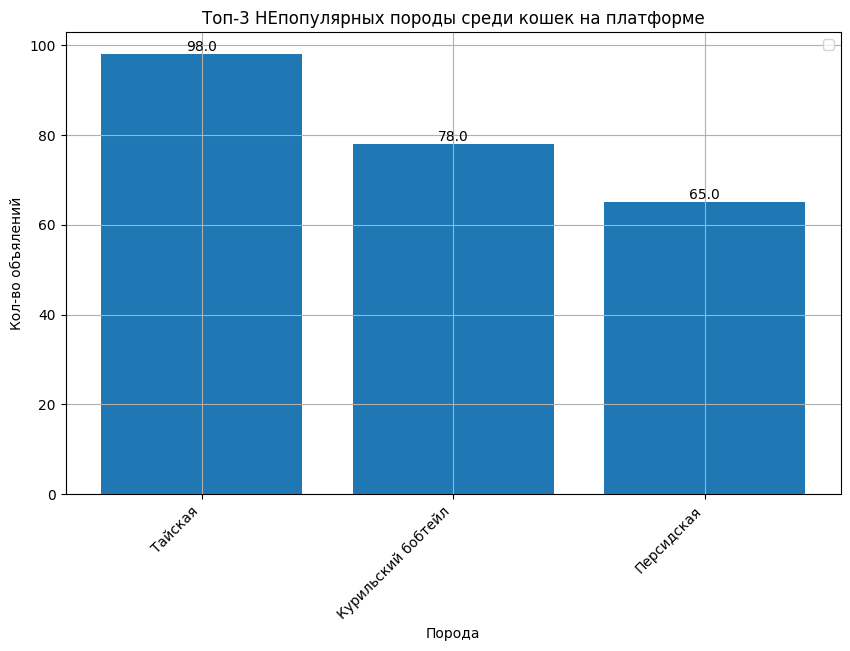

In [51]:
antitop_cats = df_cats.groupby('breed')['item_id'].nunique().reset_index().sort_values(by = ['item_id'], ascending = False).iloc[-3:, :]


antitop_cats['breed_percentage'] = antitop_cats['item_id']/total_item*100

display(antitop_cats)

plt.figure(figsize=(10,6))
bars = plt.bar(antitop_cats['breed'], antitop_cats['item_id'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title(f'Топ-3 НЕпопулярных породы среди кошек на платформе')
plt.grid()
plt.legend()
plt.xlabel('Порода')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Кол-во объялений')
plt.show()

Промежуточные итоги:
- Объявлений с кошками (24973) больше, чем с собками (20216). Разница составила 4757 объявлений. 
- Топ-3 популярных породы собак на платформе (в рассчете на кол-во объявлений с этими породами): Дог (1918 объявления- 4.42% от общего числа объявлений на платформе), Шпиц (1124 - 2.49%), Чихуахуа (712 - 1.57%). 
- Топ-3 НЕпопулярных породы собак на платформе (в рассчете на кол-во объявлений с этими породами): Боксер (67- 0.148%), Бивер (66 - 0.146%), Мастиф (45 - 0.099%). 
- Топ-3 популярных породы кошек на платформе (в рассчете на кол-во объявлений с этими породами): Шотландаская (1188 объявления- 2.63% от общего числа объявлений), Британская (920 - 2.03%), Мейн-кун (606 - 1.34%). 
- Топ-3 НЕпопулярных породы кошек на платформе (в рассчете на кол-во объявлений с этими породами): Тайская (98 объявления- 0.217%), Курильский бобтейл (78 - 0.173%), Персидская (65 - 0.144%). 
- Больше всего среди собак и кошек популярна категория "Неизвестно" в породах, среди собак она составила 10904 объявления - 24.13%, среди кошек - 20239 объявления - 44.79%, почти в два раза больше. Напомним, что "Неизвестно" это заглушка по пропускам, которую мы поставили в части "Предобработка данных". 

### Динамика "ликвидности": какие категории (кошки/собаки, породы) быстрее находят покупателей (отношение contacts / days_active)?

/var/folders/xl/_7t_lfxs2cn13d3n1jpw_wgm0000gn/T/ipykernel_4538/1714918216.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


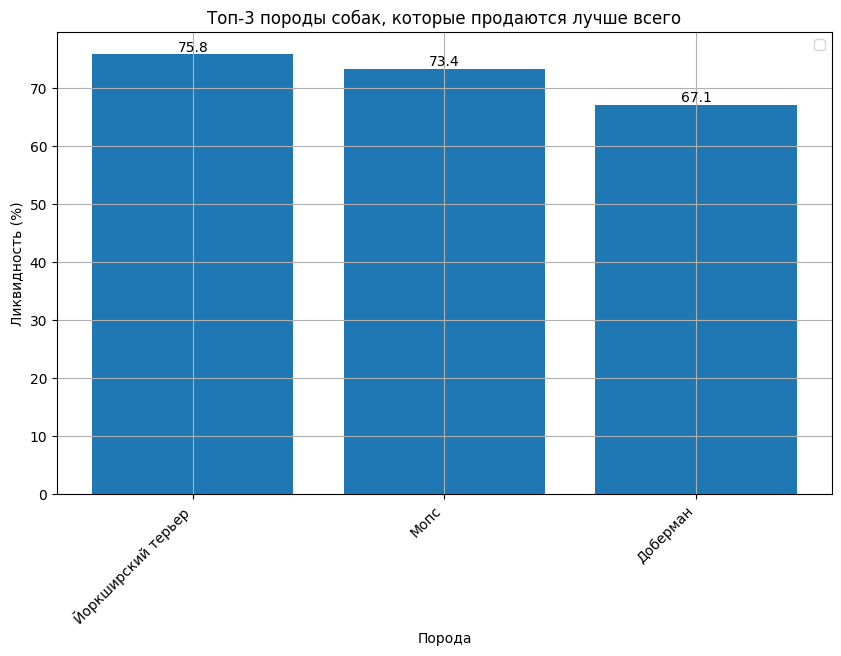

,breed,liq
10,Йоркширский терьер,75.821596
17,Мопс,73.369565
8,Доберман,67.110799


/var/folders/xl/_7t_lfxs2cn13d3n1jpw_wgm0000gn/T/ipykernel_4538/1714918216.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


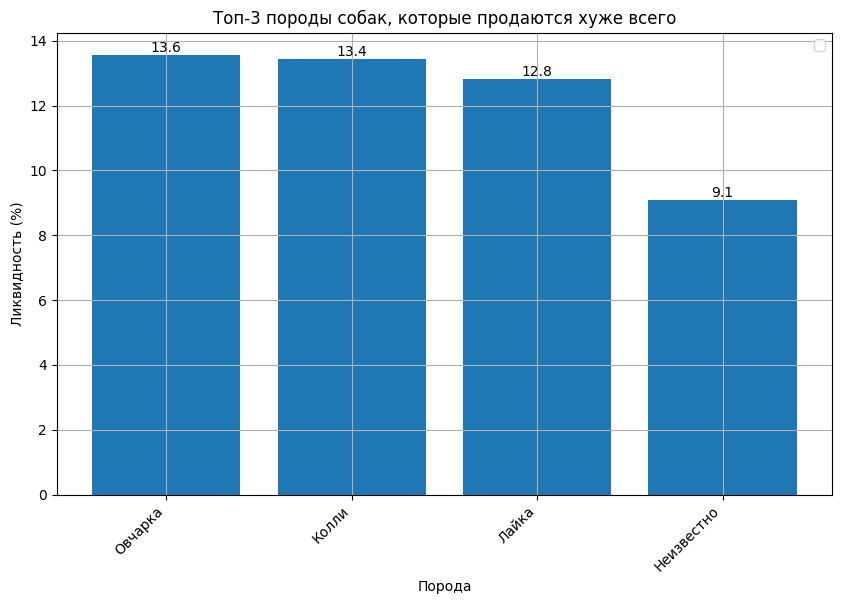

,breed,liq
19,Овчарка,13.572474
12,Колли,13.437704
15,Лайка,12.814782
18,Неизвестно,9.088386


In [52]:
# Найдем ликвидность для каждой пород собак
df_dogs_contacts = df_dogs.groupby('breed')['contacts'].sum()
df_dogs_days_active= df_dogs.groupby('breed')['days_active'].sum()

# Считаем ликвидность
liq_dogs = df_dogs_contacts/df_dogs_days_active*100
liq_dogs = liq_dogs.reset_index(name = 'liq').sort_values(by = 'liq', ascending = False)

# Выделим топ-3 породы, которые продаются лучше и хуже всего
top_liq_dogs = liq_dogs.iloc[0:3, :]
antitop_liq_dogs = liq_dogs.iloc[-4:, :]

# Визуализируем полученные результаты
plt.figure(figsize=(10,6))
bars = plt.bar(top_liq_dogs['breed'], top_liq_dogs['liq'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title(f'Топ-3 породы собак, которые продаются лучше всего')
plt.grid()
plt.legend()
plt.xlabel('Порода')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Ликвидность (%)')
plt.show()

display(top_liq_dogs)

plt.figure(figsize=(10,6))
bars = plt.bar(antitop_liq_dogs['breed'], antitop_liq_dogs['liq'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title(f'Топ-3 породы собак, которые продаются хуже всего')
plt.grid()
plt.legend()
plt.xlabel('Порода')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Ликвидность (%)')
plt.show()

display(antitop_liq_dogs)

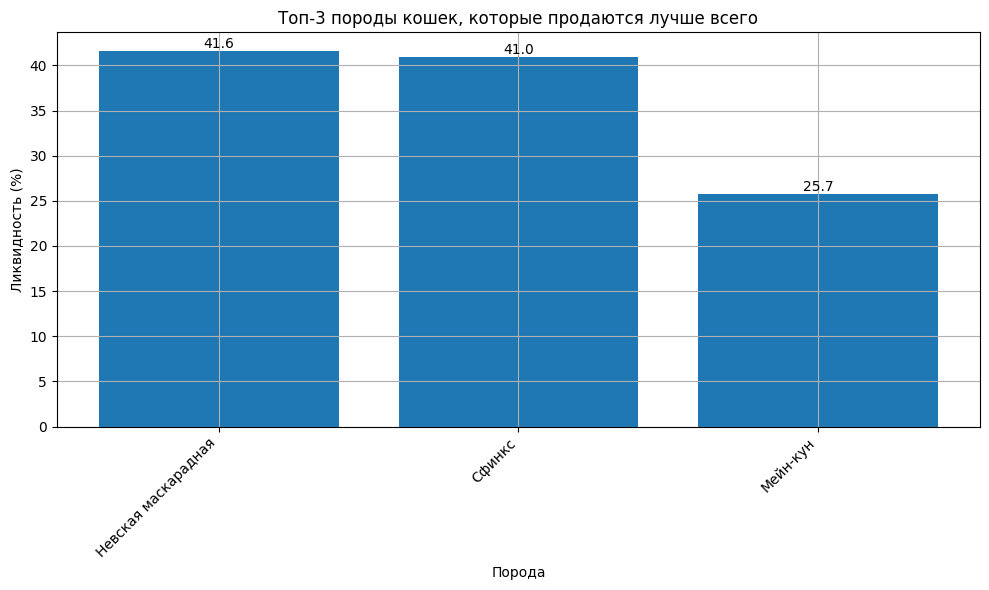

,breed,liq
5,Невская маскарадная,41.583665
11,Сфинкс,40.960838
4,Мейн-кун,25.723173


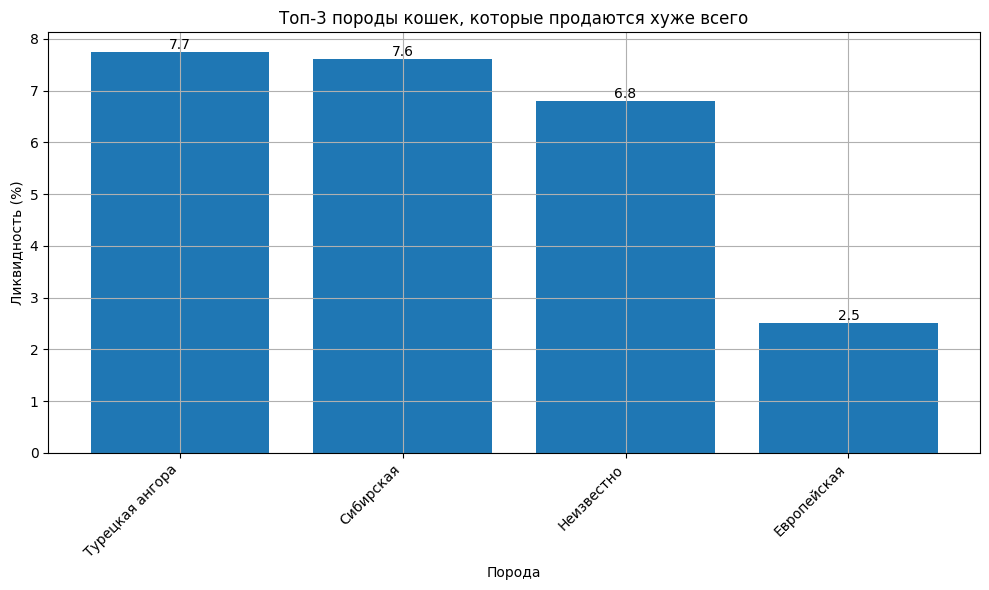

,breed,liq
13,Турецкая ангора,7.740214
10,Сибирская,7.605344
6,Неизвестно,6.790817
2,Европейская,2.502607


In [53]:
# Найдем ликвидность для каждой пород кошек
df_cats_contacts = df_cats.groupby('breed')['contacts'].sum()
df_cats_days_active = df_cats.groupby('breed')['days_active'].sum()
# Считаем ликвидность
liq_cats = df_cats_contacts / df_cats_days_active * 100
liq_cats = liq_cats.reset_index(name='liq').sort_values(by='liq', ascending=False)

# Выделим топ-3 породы, которые продаются лучше и хуже всего
top_liq_cats = liq_cats.iloc[0:3, :]
antitop_liq_cats = liq_cats.iloc[-4:, :]

# Визуализируем полученные результаты
plt.figure(figsize=(10, 6))
bars = plt.bar(top_liq_cats['breed'], top_liq_cats['liq'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title('Топ-3 породы кошек, которые продаются лучше всего')
plt.grid()
plt.xlabel('Порода')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ликвидность (%)')
plt.tight_layout()
plt.show()

display(top_liq_cats)

plt.figure(figsize=(10, 6))
bars = plt.bar(antitop_liq_cats['breed'], antitop_liq_cats['liq'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title('Топ-3 породы кошек, которые продаются хуже всего')
plt.grid()
plt.xlabel('Порода')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ликвидность (%)')
plt.tight_layout()
plt.show()

display(antitop_liq_cats)

Промежуточные итоги:

Напомню формулу ликвидности: начала чата или просмотр номера телефона/дни активности объявления за ноябрь 2023

Топ- 3 породы собак, которые продаются лучше всего (высокая ликвидность):
- Йоркширский терьер - 75.8%
- Мопс - 73.4%
- Доберман - 67.1%

Топ- 3 породы собак, которые продаются хуже всего (низкая ликвидность):
- Овчарка - 13.6%
- Колли - 13.4%
- Лайка - 12.8%
- Неизвестно - 9.1%

Топ- 3 породы кошек, которые продаются лучше всего (высокая ликвидность):
- Невская маскарадная - 41.6%
- Сфинкс - 41.0%
- Мей-кун - 25.7%

Топ- 3 породы кошек, которые продаются хуже всего (низкая ликвидность):
- Турецкая ангора - 7.7%
- Сибирская - 7.6%
- Неизвестно - 6.8%
- Европейская - 2.5%

Хочется отметить, что хуже всего среди кошек и собак продаются объявления с породой "Неизвестно" - те объявления, в которых по заголовку и описанию не смогла определиться порода животного (напомним, что в некоторых заголовках и описаниях она могла быть указана, но система ее так и не определила). Люди обычно ищут животного именно по породе и объявления, в которых она не указана, скорее всего, просто выпадают из поиска и поэтому имеют низкую ликвидность. Такие объявления, вероятно, могут очень долго быть активными и иметь мало откликов. Из прошлого пункта мы выяснили, что в Топ-3 популярных объявлений по породам среди обеих категорий входят как раз таки объявления с породой "Неизвестно". Это может значить, что бОльшая часть объявлений на платформе не ликвидна. Это проблема, так как из-за нее платформа имеет меньше завершенных сделок -> меньший процент от продажи -> меньше прибыль. 

### Формирование рекомендаций для продукта

**Инсайты**
- Одной из самых популярных по кол-ву объявлений и ликвидной породы кошек оказалась Мей-кун (606 объявлений, ликвидность 25.7%)
- Больше всего среди собак и кошек популярна категория "Неизвестно" в породах, среди собак она составила 10904 объявления - 24.13%, среди кошек - 20239 объявления - 44.79%.
- Хочется отметить, что хуже всего среди кошек и собак продаются объявления с породой "Неизвестно" - те объявления, в которых по заголовку и описанию не смогла определиться порода животного (напомним, что в некоторых заголовках и описаниях она могла быть указана, но система ее так и не определила).

**Рекомендации:** 
- Обязать заполнять породу самим продавцом, отказаться от автоматического определения породы по заголовку и описанию объявления, так как в данном случае допускается большое кол-во технических ошибок и сбоев. 

## Итоговые рекомендации по проекту

Данный анализ актуален сделан на основании данных за ноябрь 2023 года. 

1. Обязать продавцов заполнять пункт о цене животного на платформе, даже если животное продается за 0 рублей (то есть продавец готов отдать его бесплатно), так как отсутсвие цен сильно искажает данные и не дает объективного представления о рынке + может сбивать покупателей. 
2. Обязать продавцов заполнять информацию о возрасте животного и создать отедльный вариант "Возраст не известен", если продавец не знает возраста животного, так как отсуствие возраста сильно искажает данные и не дает объективного представления о рынке + может сбивать покупателей. 
3. Обязать заполнять продавцов пункт о породе животного, для беспородных животных сделать отдельный вариант "Без породы", так как сейчас на платформе очень много объявлений, в которых пропущена порода, они превалируют над всеми остальными, в то же время такие объявления наименее ликвидны. 
4. Начать отслеживать дургие действия покупателей, помимо просмотра страницы, добавления в избранное и начала чата. Необходимо начать отслеживать следующие действия для более детального анализа пользовательского маршурта:
- page_click - клик пользователя по конкретному объявлению и его изучение
- start_order - сделал закакз и ждет доставки/сделал заказ и назначил встречу с продавцом
- delivery - количество пользователей, выбравших именно доставку товара, а не личную встречу
- cancel_order - заказ не подашел и сделка не завершилась
- complete_order - сделка состоялась, товар выкуплен
- review_after_order - пользователь оставил отзыв после завершения сделки. 